# **Analisa Statistik Pengaruh Pendidikan Terhadap Kekerasan**

## Definisi Kekerasan Dalam Rumah Tangga (KDRT)

Kekerasan pada rumah tangga adalah tindakan yang dilakukan oleh seseorang terhadap pasangan, anggota keluarga, atau orang yang tinggal serumah dengannya yang berupa penggunaan atau ancaman kekerasan fisik, seksual, psikologis, atau ekonomi yang dapat menyebabkan penderitaan atau cedera pada korban. Kekerasan pada rumah tangga sering kali terjadi dalam situasi ketidaksetaraan kekuasaan dan kontrol yang salah satu pihak memegang kekuasaan lebih besar daripada yang lainnya, seperti hubungan antara suami istri atau orang tua dan anak. Kekerasan pada rumah tangga dapat terjadi dalam berbagai bentuk, seperti pemukulan, pemerkosaan, pelecehan verbal, isolasi, atau pengendalian finansial, dan dapat memiliki dampak jangka panjang yang serius pada korban seperti trauma, depresi, gangguan stres pasca trauma, dan lain sebagainya.

## Keterkaitan Tingkat Pengangguran Dengan KDRT

Dalam studi analisis ini, penulis mencari tahu berdasarkan data yang diperoleh apakah terdapat keterkaitan yang erat antara pengangguran dan kekerasan dalam rumah tangga. Orang yang mengalami pengangguran cenderung memiliki stres dan ketidakpastian yang tinggi terkait dengan keuangan dan masa depan mereka, yang dapat memicu tekanan pada hubungan rumah tangga mereka. Kondisi ini dapat memperburuk situasi yang sudah ada dan meningkatkan risiko terjadinya kekerasan dalam rumah tangga. Selain itu, ketidakmampuan untuk memenuhi kebutuhan finansial dalam rumah tangga dapat menimbulkan ketegangan dan meningkatkan kemungkinan terjadinya konflik dan kekerasan. Studi menunjukkan bahwa orang yang menganggur memiliki kemungkinan lebih besar untuk melakukan tindakan kekerasan dalam rumah tangga daripada mereka yang bekerja.

## Keterkaitan Pendidikan Dengan Tingkat Pengangguran

Pendidikan dan pengangguran memiliki keterkaitan yang kompleks. Secara umum, tingkat pendidikan yang lebih tinggi dikaitkan dengan tingkat pengangguran yang lebih rendah. Orang yang memiliki pendidikan yang lebih tinggi cenderung memiliki keterampilan dan kualifikasi yang lebih tinggi, yang dapat membuka peluang kerja yang lebih baik dan membuat mereka lebih berdaya saing di pasar tenaga kerja. Di sisi lain, orang yang memiliki pendidikan yang lebih rendah mungkin lebih rentan mengalami pengangguran karena kurangnya keterampilan dan kualifikasi yang dibutuhkan oleh pasar tenaga kerja.

Pengangguran sendiri diketahui sebagai faktor risiko penting dalam terjadinya kekerasan dalam rumah tangga. Orang yang mengalami pengangguran dapat mengalami tekanan dan ketidakpastian yang tinggi terkait dengan keuangan dan masa depan mereka, yang dapat memicu tekanan pada hubungan rumah tangga mereka dan meningkatkan risiko terjadinya kekerasan. Oleh karena itu, untuk mengurangi risiko kekerasan dalam rumah tangga, penting untuk mencari cara untuk mengatasi pengangguran dan membantu orang mendapatkan pekerjaan yang stabil dan memadai.

Namun, perlu dicatat bahwa keterkaitan antara pendidikan, pengangguran, dan kekerasan dalam rumah tangga sangat kompleks dan dapat dipengaruhi oleh faktor-faktor lain seperti status sosial-ekonomi, budaya, dan faktor-faktor psikologis dan pribadi lainnya.

# **1. Load Data**

## 1.1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import math
import sympy as sy
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import seaborn as sns
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

auth.authenticate_user()
print('Authenticated')

project_id = 'hacktiv8-tama'
client = bigquery.Client(project = project_id)

Authenticated


## 1.2. Sumber Data

### 1.2.1. KDRT kepada laki-laki

Dataset ini berisi korban KDRT terhadap laki-laki, dari rentang usia balita hingga lansia, dan rentang kejadian dari tahun 2017 hingga 2020, untuk sejumlah kabupaten dan kota di provinsi Jawa Barat.  

source :  
https://opendata.jabarprov.go.id/id/dataset/jumlah-korban-kekerasan-terhadap-anak-laki-laki-berdasarkan-kelompok-usia-dan-kabupatenkota-di-jawa-barat

BigQuery :  
hacktiv8-tama.kekerasan_pada_lakilaki_lakilaki

In [2]:
fam_violence_male = client.query('''
  select *
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
  order by id, tahun''').to_dataframe()
fam_violence_male.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_usia,jumlah_korban,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-5 TAHUN,0,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,6-12 TAHUN,1,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,13-17 TAHUN,0,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,18-24 TAHUN,0,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,25-44 TAHUN,0,2017
5,6,32,JAWA BARAT,3201,KABUPATEN BOGOR,45-59 TAHUN,0,2017
6,7,32,JAWA BARAT,3201,KABUPATEN BOGOR,60+ TAHUN,0,2017
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0-5 TAHUN,1,2017
8,9,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,6-12 TAHUN,1,2017
9,10,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,13-17 TAHUN,2,2017


### 1.2.2. KDRT kepada perempuan

Dataset ini berisi korban KDRT terhadap perempuan, dari rentang usia balita hingga lansia, dan rentang kejadian dari tahun 2017 hingga 2020, untuk sejumlah kabupaten dan kota di provinsi Jawa Barat.  

source :  
https://opendata.jabarprov.go.id/id/dataset/jumlah-korban-kekerasan-terhadap-anak-perempuan-berdasarkan-kelompok-usia-dan-kabupatenkota-di-jawa-barat

BigQuery :  
hacktiv8-tama.kekerasan_pada_lakilaki_perempuan

In [3]:
fam_violence_female = client.query('''
  select *
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
  order by tahun, id asc''').to_dataframe()
fam_violence_female.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_usia,jumlah_korban,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-5 TAHUN,0,ORANG,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,6-12 TAHUN,0,ORANG,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,13-17 TAHUN,0,ORANG,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,18-24 TAHUN,0,ORANG,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,25-44 TAHUN,0,ORANG,2017
5,6,32,JAWA BARAT,3201,KABUPATEN BOGOR,45-59 TAHUN,0,ORANG,2017
6,7,32,JAWA BARAT,3201,KABUPATEN BOGOR,60+ TAHUN,0,ORANG,2017
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0-5 TAHUN,4,ORANG,2017
8,9,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,6-12 TAHUN,3,ORANG,2017
9,10,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,13-17 TAHUN,11,ORANG,2017


### 1.2.3 Indeks Pengangguran

Dataset ini berisi datajumlah penganggur terbuka berdasarkan pendidikan di Provinsi Jawa Barat dari tahun 2011 s.d. 2021.

Dataset terkait topik Kependudukan ini dihasilkan oleh Dinas Tenaga Kerja dan Transmigrasi yang dikeluarkan dalam periode 1 tahun sekali. 

sumber :  
https://opendata.jabarprov.go.id/id/dataset/jumlah-pengangguran-terbuka-berdasarkan-pendidikan-di-jawa-barat

BigQuery :  
hacktiv8-tama.indeks_sosial_jabar.indeks_pengangguran

In [4]:
indeks_pengangguran = client.query('''
  select
    nama_kabupaten_kota as wilayah,
    pendidikan as pendidikan,
    jumlah_pengangguran as jumlah_pengangguran,
    tahun as tahun
  from
    `hacktiv8-tama.indeks_sosial_jabar.indeks_pengangguran`
''').to_dataframe()

indeks_pengangguran

,wilayah,pendidikan,jumlah_pengangguran,tahun
0,KABUPATEN BOGOR,SD KE BAWAH,90529.0,2011
1,KABUPATEN BOGOR,SLTP,38379.0,2011
2,KABUPATEN BOGOR,SLTA,93730.0,2011
3,KABUPATEN BOGOR,TIDAK/BELUM PERNAH SEKOLAH/TIDAK/BELUM TAMAT SD,15661.0,2012
4,KABUPATEN BOGOR,SD,60646.0,2012
...,...,...,...,...
1291,KOTA BANJAR,SD KE BAWAH,1280.0,2021
1292,KOTA BANJAR,SMP,739.0,2021
1293,KOTA BANJAR,SMA (UMUM),924.0,2021
1294,KOTA BANJAR,SMA (KEJURUAN),2517.0,2021


### 1.2.4. Indeks Pendidikan

Dataset ini berisi data indeks pendidikan berdasarkan kabupaten/kota di Provinsi Jawa Barat dari tahun 2010 s.d. 2019. 

Dataset terkait topik pendidikan ini bersumber dari Badan Pusat Statistik dan diolah oleh Dinas Komunikasi dan Informatika yang dikeluarkan dalam periode 1 tahun sekali. 

sumber :  
https://opendata.jabarprov.go.id/id/dataset/indeks-pendidikan-berdasarkan-kabupatenkota-di-jawa-barat

In [5]:
indeks_pendidikan = client.query('''
  select
    nama_kabupaten_kota as wilayah,
    indeks_pendidikan,
    tahun
  from
    `hacktiv8-tama.indeks_sosial_jabar.indeks_pendidikan`;
''').to_dataframe()

indeks_pendidikan

,wilayah,indeks_pendidikan,tahun
0,KABUPATEN BOGOR,51.55,2010
1,KABUPATEN BOGOR,52.50,2011
2,KABUPATEN BOGOR,54.53,2012
3,KABUPATEN BOGOR,57.11,2013
4,KABUPATEN BOGOR,58.60,2014
...,...,...,...
316,KOTA BANJAR,65.27,2017
317,KOTA BANJAR,65.33,2018
318,KOTA BANJAR,65.46,2019
319,KOTA BANJAR,65.52,2020


## 2.2. Explorasi Data

### 2.2.1. Total Korban KDRT terhadap laki-laki dan perempuan

Untuk studi analisis ini, penulis tidak akan membedakan korban berdasarkan jenis kelamin, namun melihat secara keseluruhan total korban berdasarkan wilayah dan tahun sehingga kolom yang akan penulis butuhkan adalah nama kota/kabupaten, tahun, dan jumlah korban. Dari 2 dataset diatas akan disatukan untuk menghitung keseluruhan jumlah korban KDRT terhadap laki-laki dan perempuan.

In [6]:
fam_violence_MF = client.query('''
    SELECT
    kabupaten,
    tahun,
    SUM(jumlah_korban) AS korban_kekerasan
  FROM
  (SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'laki-laki' AS jenis_kelamin
  FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
  UNION ALL
  SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'perempuan' AS jenis_kelamin
  FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
  GROUP BY kabupaten, tahun;
  ''').to_dataframe()
  
fam_violence_MF

,kabupaten,tahun,korban_kekerasan
0,KABUPATEN BOGOR,2017,1
1,KABUPATEN BOGOR,2018,1
2,KABUPATEN BOGOR,2019,5
3,KABUPATEN BOGOR,2020,10
4,KABUPATEN BOGOR,2021,23
...,...,...,...
130,KOTA BANJAR,2017,13
131,KOTA BANJAR,2018,13
132,KOTA BANJAR,2019,0
133,KOTA BANJAR,2020,18


In [7]:
# Wilayah di provinsi Jawa Barat

for i, wilayah in enumerate(fam_violence_MF.kabupaten.unique(), start=1):
    print(f"{i}. {wilayah}")

1. KABUPATEN BOGOR
2. KABUPATEN SUKABUMI
3. KABUPATEN CIANJUR
4. KABUPATEN BANDUNG
5. KABUPATEN GARUT
6. KABUPATEN TASIKMALAYA
7. KABUPATEN CIAMIS
8. KABUPATEN KUNINGAN
9. KABUPATEN CIREBON
10. KABUPATEN MAJALENGKA
11. KABUPATEN SUMEDANG
12. KABUPATEN INDRAMAYU
13. KABUPATEN SUBANG
14. KABUPATEN PURWAKARTA
15. KABUPATEN KARAWANG
16. KABUPATEN BEKASI
17. KABUPATEN BANDUNG BARAT
18. KABUPATEN PANGANDARAN
19. KOTA BOGOR
20. KOTA SUKABUMI
21. KOTA BANDUNG
22. KOTA CIREBON
23. KOTA BEKASI
24. KOTA DEPOK
25. KOTA CIMAHI
26. KOTA TASIKMALAYA
27. KOTA BANJAR


In [8]:
# Rentang tahun survey

for i, wilayah in enumerate(fam_violence_MF.tahun.unique(), start=1):
    print(f"{i}. {wilayah}")

1. 2017
2. 2018
3. 2019
4. 2020
5. 2021


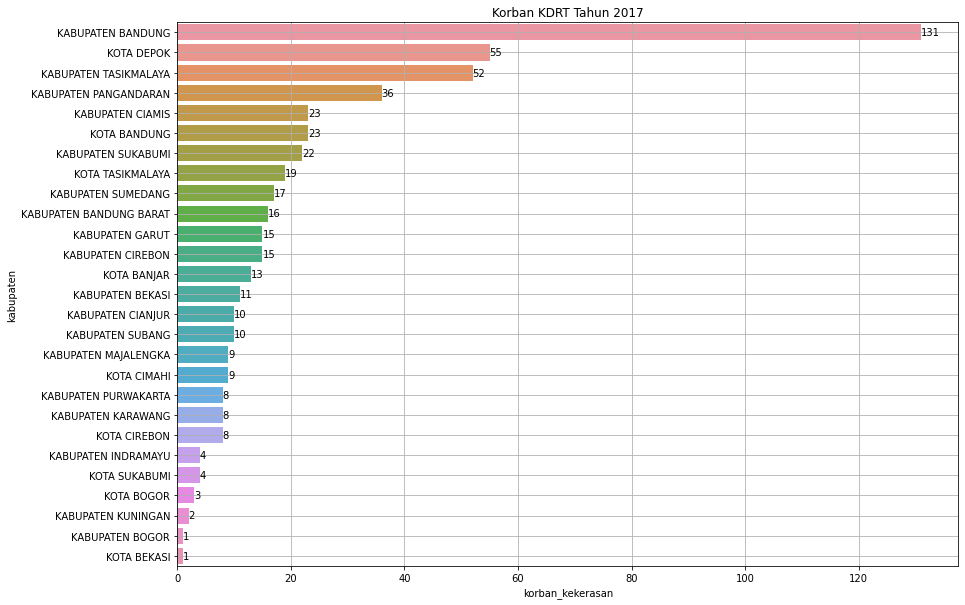

In [9]:
# Jumlah korban tahun 2017
th2017 = client.query('''
  SELECT
    kabupaten,
    SUM(jumlah_korban) AS korban_kekerasan
  FROM
    (SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'laki-laki' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    UNION ALL
    SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'perempuan' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
  WHERE tahun = 2017
  GROUP BY kabupaten, tahun
  ORDER BY korban_kekerasan desc
  ''').to_dataframe()

# tampilkan dalam bentuk grafik
plt.figure(figsize=(14,10))
ax = sns.barplot(data=th2017, y=th2017.kabupaten, x=th2017.korban_kekerasan)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title("Korban KDRT Tahun 2017")
plt.grid()
plt.show()

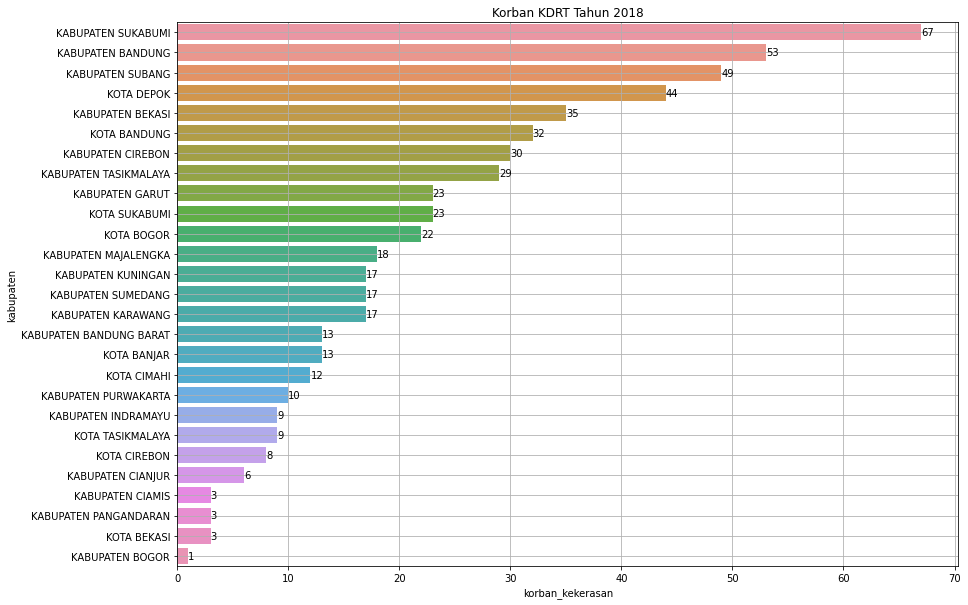

In [10]:
# Jumlah korban tahun 2018
th2018 = client.query('''
  SELECT
    kabupaten,
    SUM(jumlah_korban) AS korban_kekerasan
  FROM
    (SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'laki-laki' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    UNION ALL
    SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'perempuan' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
  WHERE tahun = 2018
  GROUP BY kabupaten, tahun
  ORDER BY korban_kekerasan desc
  ''').to_dataframe()

# tampilkan dalam bentuk grafik
plt.figure(figsize=(14,10))
ax = sns.barplot(data=th2018, y=th2018.kabupaten, x=th2018.korban_kekerasan)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title("Korban KDRT Tahun 2018")
plt.grid()
plt.show()

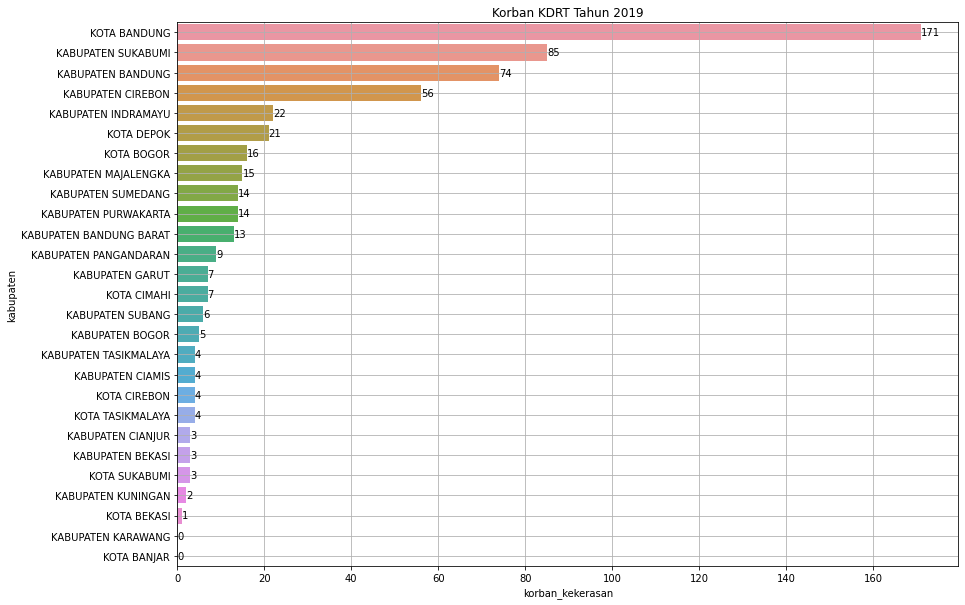

In [11]:
# Jumlah korban tahun 2019
th2019 = client.query('''
  SELECT
    kabupaten,
    SUM(jumlah_korban) AS korban_kekerasan
  FROM
    (SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'laki-laki' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    UNION ALL
    SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'perempuan' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
  WHERE tahun = 2019
  GROUP BY kabupaten, tahun
  ORDER BY korban_kekerasan desc
  ''').to_dataframe()

# tampilkan dalam bentuk grafik
plt.figure(figsize=(14,10))
ax = sns.barplot(data=th2019, y=th2019.kabupaten, x=th2019.korban_kekerasan)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title("Korban KDRT Tahun 2019")
plt.grid()
plt.show()

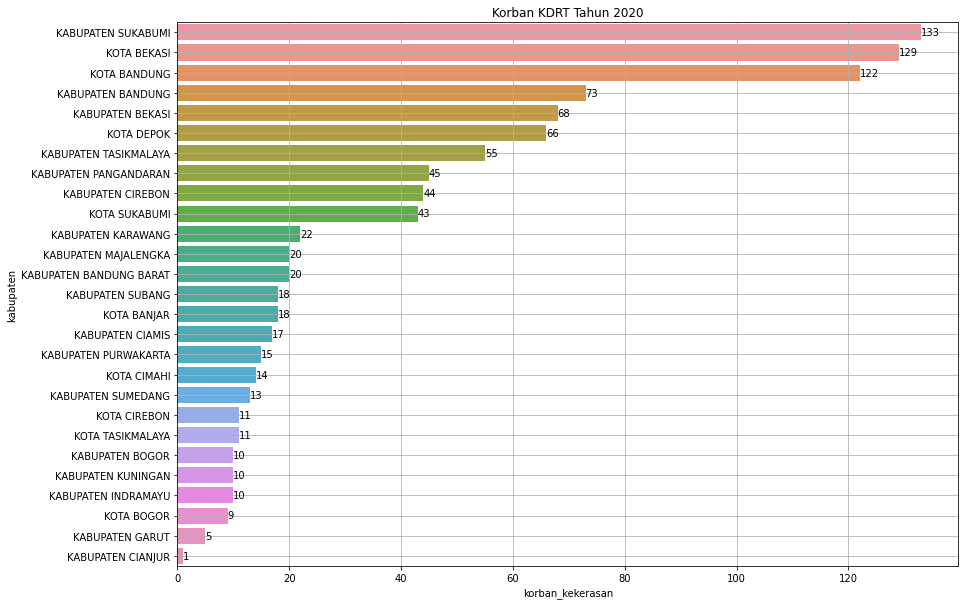

In [12]:
# Jumlah korban tahun 2020
th2020 = client.query('''
  SELECT
    kabupaten,
    SUM(jumlah_korban) AS korban_kekerasan
  FROM
    (SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'laki-laki' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    UNION ALL
    SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'perempuan' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
  WHERE tahun = 2020
  GROUP BY kabupaten, tahun
  ORDER BY korban_kekerasan desc
  ''').to_dataframe()

# tampilkan dalam bentuk grafik
plt.figure(figsize=(14,10))
ax = sns.barplot(data=th2020, y=th2020.kabupaten, x=th2020.korban_kekerasan)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title("Korban KDRT Tahun 2020")
plt.grid()
plt.show()

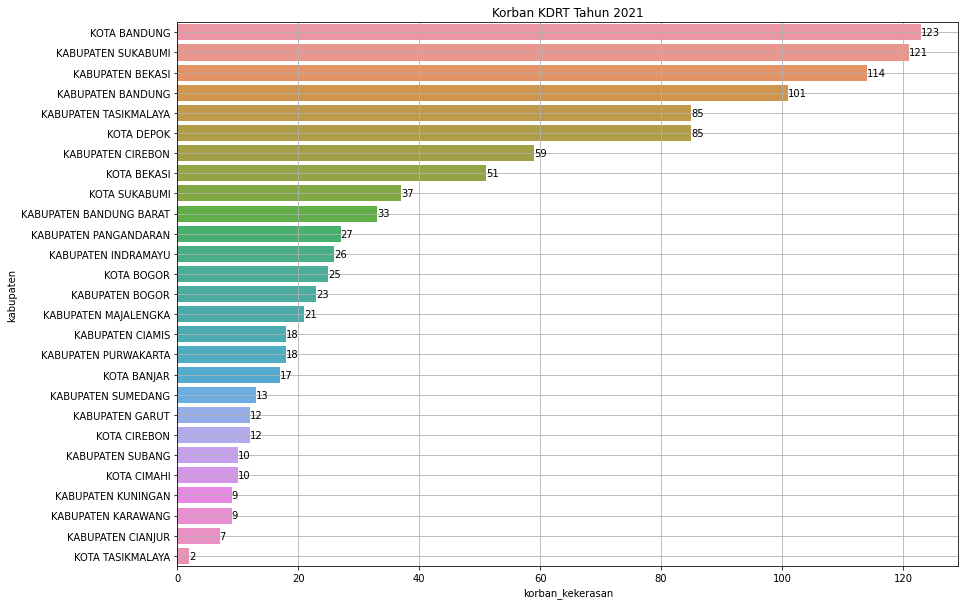

In [13]:
# Jumlah korban tahun 2021
th2021 = client.query('''
  SELECT
    kabupaten,
    SUM(jumlah_korban) AS korban_kekerasan
  FROM
    (SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'laki-laki' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    UNION ALL
    SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'perempuan' AS jenis_kelamin
    FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
  WHERE tahun = 2021
  GROUP BY kabupaten, tahun
  ORDER BY korban_kekerasan desc
  ''').to_dataframe()

# tampilkan dalam bentuk grafik
plt.figure(figsize=(14,10))
ax = sns.barplot(data=th2021, y=th2021.kabupaten, x=th2021.korban_kekerasan)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title("Korban KDRT Tahun 2021")
plt.grid()
plt.show()

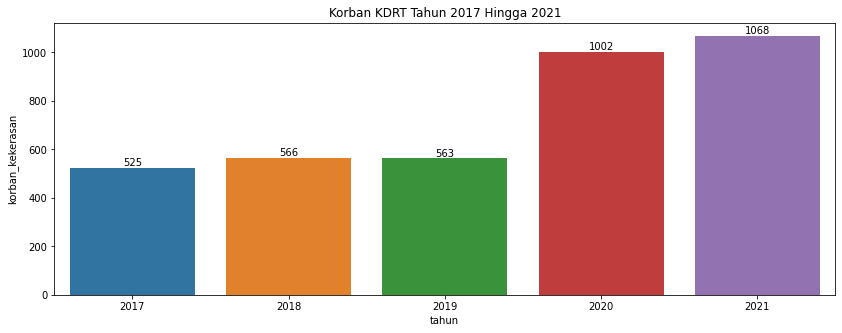

In [14]:
# Total korban KDRT dari tahun ke tahun

yeartoyear = client.query('''
  SELECT
    distinct tahun,
    sum(jumlah_korban) as korban_kekerasan
  FROM
  (SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'laki-laki' AS jenis_kelamin
  FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
  UNION ALL
  SELECT
    nama_kabupaten_kota AS kabupaten,
    kelompok_usia AS usia,
    jumlah_korban,
    tahun,
    'perempuan' AS jenis_kelamin
  FROM `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
  group by tahun;
''').to_dataframe()

# tampilkan dalam bentuk grafik
plt.figure(figsize=(14,5))
ax = sns.barplot(data=yeartoyear, y=yeartoyear.korban_kekerasan, x=yeartoyear.tahun)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.title("Korban KDRT Tahun 2017 Hingga 2021")
plt.show()

Kekerasan dalam rumah tangga merupakan masalah serius yang masih menjadi ancaman bagi banyak orang. Data statistik menunjukkan bahwa jumlah korban kekerasan dalam rumah tangga di Jawa Barat terus meningkat dari tahun ke tahun. Pada tahun 2017, terdapat 252 orang yang menjadi korban kekerasan dalam rumah tangga, kemudian meningkat menjadi 566 orang pada tahun 2018, 563 orang pada tahun 2019, dan 1002 orang pada tahun 2020. Sayangnya, pada tahun 2021, angka korban meningkat lagi menjadi 1068 orang. Kondisi ini menunjukkan bahwa tindakan pencegahan dan penanganan kekerasan dalam rumah tangga masih memerlukan perhatian serius dari semua pihak.

In [15]:
# Kota pada peringkat pertama dalam setiap tahun

firstrank = client.query('''
select
  distinct tahun,
  kabupaten as first_rank_kota,
  jumlah_korban
from
  (select *,
    dense_rank() over (partition by tahun order by jumlah_korban desc) as rank
  from
    (select
        distinct tahun,
        kabupaten,
        sum(jumlah_korban) as jumlah_korban
      from
        (select
          nama_kabupaten_kota as kabupaten,
          kelompok_usia as usia,
          jumlah_korban,
          tahun,
          'laki-laki' as jenis_kelamin
        from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
        union all
        select
          nama_kabupaten_kota as kabupaten,
          kelompok_usia as usia,
          jumlah_korban,
          tahun,
          'perempuan' as jenis_kelamin
        from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
        order by jumlah_korban, tahun desc)
      group by tahun, kabupaten))
where rank=1
order by tahun
''').to_dataframe()
firstrank

,tahun,first_rank_kota,jumlah_korban
0,2017,KABUPATEN BANDUNG,131
1,2018,KABUPATEN SUKABUMI,67
2,2019,KOTA BANDUNG,171
3,2020,KABUPATEN SUKABUMI,133
4,2021,KOTA BANDUNG,123


Dari 5 grafik diatas, penulis mengambil kota pada peringkat pertama pada setiap tahunnya, dari tahun 2017 hingga 2021.  

* Tahun 2017 Kabupaten Bandung memiliki jumlah korban sebanyak 131 orang.  

* Sementara itu Kabupaten Sukabumi muncul sebanyak 2 kali sebagai kota peringkat pertama KDRT pada tahun 2018 dan 2020 dengan total korban sebanyak 200 orang.  

* Kota Bandung juga muncul sebanyak 2 kali sebagai kota peringkat pertama KDRT pada tahun 2019 dan 2021 dengan total sebanyak 294 orang.  

Tiga kota tersebut yang akan menjadi perhatian penulis untuk mencari korelasi apakah tingkat pendidikan dan tingkat pengangguran mempengaruhi isu sosial kekerasan dalam rumah tangga yang terjadi di Jawa Barat.

### 2.2.2. Indeks Pengangguran

In [16]:
# tipe data pada dataset Indeks Pengangguran

indeks_pengangguran.dtypes

wilayah                 object
pendidikan              object
jumlah_pengangguran    float64
tahun                    Int64
dtype: object

In [17]:
indeks_pengangguran

,wilayah,pendidikan,jumlah_pengangguran,tahun
0,KABUPATEN BOGOR,SD KE BAWAH,90529.0,2011
1,KABUPATEN BOGOR,SLTP,38379.0,2011
2,KABUPATEN BOGOR,SLTA,93730.0,2011
3,KABUPATEN BOGOR,TIDAK/BELUM PERNAH SEKOLAH/TIDAK/BELUM TAMAT SD,15661.0,2012
4,KABUPATEN BOGOR,SD,60646.0,2012
...,...,...,...,...
1291,KOTA BANJAR,SD KE BAWAH,1280.0,2021
1292,KOTA BANJAR,SMP,739.0,2021
1293,KOTA BANJAR,SMA (UMUM),924.0,2021
1294,KOTA BANJAR,SMA (KEJURUAN),2517.0,2021


In [18]:
# Wilayah di provinsi Jawa Barat

for i, wilayah in enumerate(indeks_pengangguran.wilayah.unique(), start=1):
    print(f"{i}. {wilayah}")

1. KABUPATEN BOGOR
2. KABUPATEN SUKABUMI
3. KABUPATEN CIANJUR
4. KABUPATEN BANDUNG
5. KABUPATEN GARUT
6. KABUPATEN TASIKMALAYA
7. KABUPATEN CIAMIS
8. KABUPATEN KUNINGAN
9. KABUPATEN CIREBON
10. KABUPATEN MAJALENGKA
11. KABUPATEN SUMEDANG
12. KABUPATEN INDRAMAYU
13. KABUPATEN SUBANG
14. KABUPATEN PURWAKARTA
15. KABUPATEN KARAWANG
16. KABUPATEN BEKASI
17. KABUPATEN BANDUNG BARAT
18. KABUPATEN PANGANDARAN
19. KOTA BOGOR
20. KOTA SUKABUMI
21. KOTA BANDUNG
22. KOTA CIREBON
23. KOTA BEKASI
24. KOTA DEPOK
25. KOTA CIMAHI
26. KOTA TASIKMALAYA
27. KOTA BANJAR


In [19]:
# Wilayah di provinsi Jawa Barat

for i, wilayah in enumerate(indeks_pengangguran.pendidikan.unique(), start=1):
    print(f"{i}. {wilayah}")

1. SD KE BAWAH
2. SLTP
3. SLTA
4. TIDAK/BELUM PERNAH SEKOLAH/TIDAK/BELUM TAMAT SD
5. SD
6. SMP
7. SMA
8. DIPLOMA I/II/III/AKADEMI/UNIVERSITAS
9. SMA (UMUM)
10. SMA (KEJURUAN)


Terdapat ketidakseragaman tingkat pendidikan pada kolom pendidikan diatas. Penulis akan menyeragamkan untuk mengurangi cardinality pada dataset tersebut. Mengubah nama pendidikan menjadi numerik.

In [20]:
indeks_pengangguran.pendidikan.unique().tolist()

['SD KE BAWAH',
 'SLTP',
 'SLTA',
 'TIDAK/BELUM PERNAH SEKOLAH/TIDAK/BELUM TAMAT SD',
 'SD',
 'SMP',
 'SMA',
 'DIPLOMA I/II/III/AKADEMI/UNIVERSITAS',
 'SMA (UMUM)',
 'SMA (KEJURUAN)']

In [21]:
ganti_nama = {'SD KE BAWAH' : 'SD',
              'SLTP' : 'SMP',
              'SLTA' : 'SMA',
              'TIDAK/BELUM PERNAH SEKOLAH/TIDAK/BELUM TAMAT SD' : 'TIDAK SEKOLAH',
              'SD' : 'SD',
              'SMP' : 'SMP',
              'SMA' : 'SMA',
              'DIPLOMA I/II/III/AKADEMI/UNIVERSITAS' : 'PERGURUAN TINGGI',
              'SMA (UMUM)' : 'SMA',
              'SMA (KEJURUAN)' : 'SMA'}

indeks_pengangguran['pendidikan'] = indeks_pengangguran['pendidikan'].replace(ganti_nama)

In [22]:
# Membentuk ulang dataset yang telah di modifikasi
indeks_pengangguran = indeks_pengangguran.groupby(['wilayah', 'pendidikan', 'tahun']).agg({'jumlah_pengangguran': 'sum'}).sort_values(by=['tahun', 'pendidikan', 'wilayah']).reset_index()
indeks_pengangguran.jumlah_pengangguran = indeks_pengangguran.jumlah_pengangguran.astype(int)

In [23]:
indeks_pengangguran

,wilayah,pendidikan,tahun,jumlah_pengangguran
0,KABUPATEN BANDUNG,SD,2011,50460
1,KABUPATEN BANDUNG BARAT,SD,2011,22902
2,KABUPATEN BEKASI,SD,2011,51362
3,KABUPATEN BOGOR,SD,2011,90529
4,KABUPATEN CIAMIS,SD,2011,30137
...,...,...,...,...
1237,KOTA CIMAHI,SMP,2021,6409
1238,KOTA CIREBON,SMP,2021,3667
1239,KOTA DEPOK,SMP,2021,9211
1240,KOTA SUKABUMI,SMP,2021,2472


<ipython-input-24-ad886ee7c5c3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=indeks_pengangguran, x=indeks_pengangguran.pendidikan, y=indeks_pengangguran.jumlah_pengangguran, ci=None)


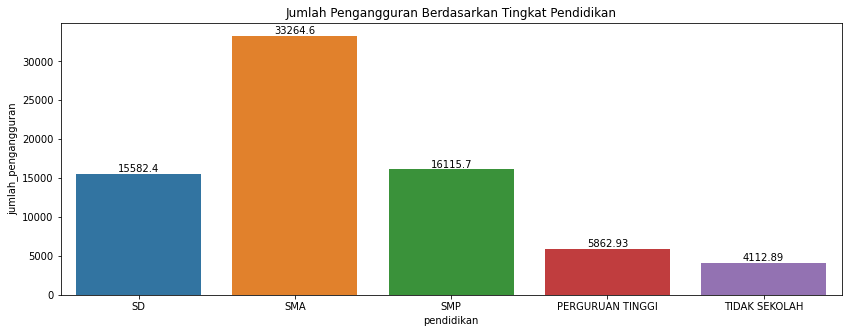

In [24]:
# jumlah penganggura berdasarkan tingkat pendidikan

plt.figure(figsize=(14,5))
ax = sns.barplot(data=indeks_pengangguran, x=indeks_pengangguran.pendidikan, y=indeks_pengangguran.jumlah_pengangguran, ci=None)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.title("Jumlah Pengangguran Berdasarkan Tingkat Pendidikan")
plt.show()

Berdasarkan grafik diatas, jumlah pengangguran pada tingkat pendidikan SMA paling tinggi diantara pendidikan lain. Jika dibandingan dengan yang tidak memiliki pendidikan sangat jauh selisihnya. Hal ini sangat menarik untuk penulis kaji lebih dalam terkait perbedaan jumlah pengangguran tersebut, yang mana seharusnya yang tidak memiliki pendidikan berada di posisi teratas.

Grafik diatas menunjukan pada tahun 2011 adalah jumlah pengangguran terbanyak. Mulai 2012 hingga 2018 jumlah pengangguran berada kondisi stabil diangaka 13000, namun mulai menanjak drastis hingga tahun 2021 kembali pada angka 22000 yang mana hampir sejajar dengan kondisi di tahun 2011.

<ipython-input-25-8131addddfb9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=sma2, y=sma2.wilayah, x=sma2.jumlah_pengangguran, ci=None)


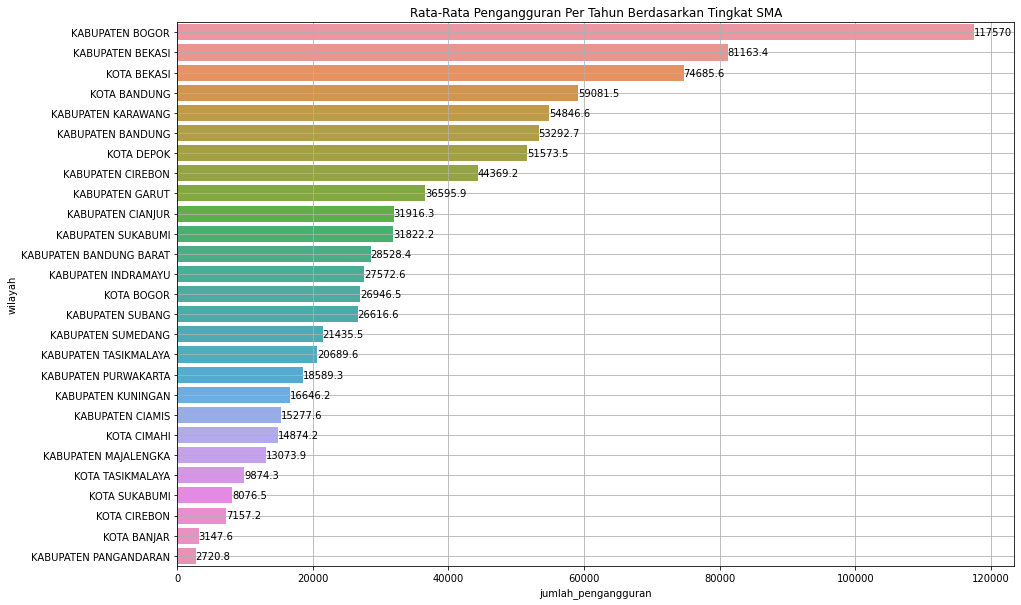

In [25]:
sma2 = indeks_pengangguran[indeks_pengangguran.pendidikan == 'SMA'].groupby(['wilayah']).agg({'jumlah_pengangguran': 'mean'}).sort_values(by='jumlah_pengangguran', ascending=False).reset_index()

plt.figure(figsize=(15,10))
ax = sns.barplot(data=sma2, y=sma2.wilayah, x=sma2.jumlah_pengangguran, ci=None)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.title("Rata-Rata Pengangguran Per Tahun Berdasarkan Tingkat SMA")
plt.grid()
plt.show()

<ipython-input-26-98ea592151c7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=indeks_pengangguran, x=indeks_pengangguran.tahun, y=indeks_pengangguran.jumlah_pengangguran, ci=None)


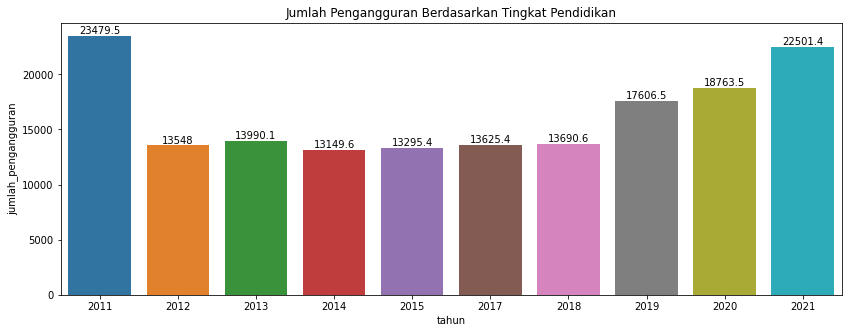

In [26]:
plt.figure(figsize=(14,5))
ax = sns.barplot(data=indeks_pengangguran, x=indeks_pengangguran.tahun, y=indeks_pengangguran.jumlah_pengangguran, ci=None)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.title("Jumlah Pengangguran Berdasarkan Tingkat Pendidikan")
plt.show()

### 2.2.3. Indeks Pendidikan

<ipython-input-27-3a93377d207a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=indeks_pendidikan, x=indeks_pendidikan.tahun, y=indeks_pendidikan.indeks_pendidikan, ci=None)


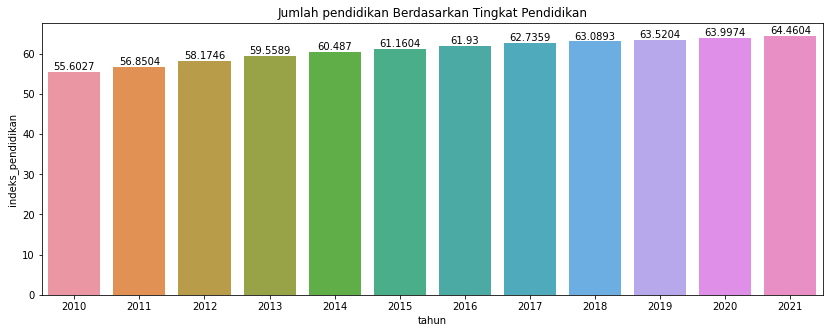

In [27]:
plt.figure(figsize=(14,5))
ax = sns.barplot(data=indeks_pendidikan, x=indeks_pendidikan.tahun, y=indeks_pendidikan.indeks_pendidikan, ci=None)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.title("Jumlah pendidikan Berdasarkan Tingkat Pendidikan")
plt.show()

In [28]:
indeks_pendidikan

,wilayah,indeks_pendidikan,tahun
0,KABUPATEN BOGOR,51.55,2010
1,KABUPATEN BOGOR,52.50,2011
2,KABUPATEN BOGOR,54.53,2012
3,KABUPATEN BOGOR,57.11,2013
4,KABUPATEN BOGOR,58.60,2014
...,...,...,...
316,KOTA BANJAR,65.27,2017
317,KOTA BANJAR,65.33,2018
318,KOTA BANJAR,65.46,2019
319,KOTA BANJAR,65.52,2020


### 2.2.4. Menggabungkan seluruh dataset

In [29]:
fam_violence_MF = fam_violence_MF.rename(columns={'kabupaten' : 'wilayah'})
fam_violence_MF

,wilayah,tahun,korban_kekerasan
0,KABUPATEN BOGOR,2017,1
1,KABUPATEN BOGOR,2018,1
2,KABUPATEN BOGOR,2019,5
3,KABUPATEN BOGOR,2020,10
4,KABUPATEN BOGOR,2021,23
...,...,...,...
130,KOTA BANJAR,2017,13
131,KOTA BANJAR,2018,13
132,KOTA BANJAR,2019,0
133,KOTA BANJAR,2020,18


In [30]:
# sum berdasarkan tahun dan wilayah
indeks_pengangguran2 = indeks_pengangguran.groupby(['wilayah', 'tahun']).agg({'jumlah_pengangguran': 'sum'}).sort_values(by=['tahun', 'wilayah']).reset_index()

In [31]:
indeks_pengangguran2

,wilayah,tahun,jumlah_pengangguran
0,KABUPATEN BANDUNG,2011,145165
1,KABUPATEN BANDUNG BARAT,2011,61868
2,KABUPATEN BEKASI,2011,123029
3,KABUPATEN BOGOR,2011,222638
4,KABUPATEN CIAMIS,2011,63021
...,...,...,...
265,KOTA CIMAHI,2021,38193
266,KOTA CIREBON,2021,16401
267,KOTA DEPOK,2021,117816
268,KOTA SUKABUMI,2021,15519


In [32]:
gabung = pd.merge(fam_violence_MF, indeks_pengangguran2, on=['wilayah', 'tahun'], how='left')
gabung = pd.merge(gabung, indeks_pendidikan, on=['wilayah', 'tahun'], how='left')
gabung.jumlah_pengangguran = gabung.jumlah_pengangguran.astype(int)
gabung.tahun = gabung.tahun.astype(object)

In [33]:
gabung

,wilayah,tahun,korban_kekerasan,jumlah_pengangguran,indeks_pendidikan
0,KABUPATEN BOGOR,2017,1,248368,60.66
1,KABUPATEN BOGOR,2018,1,254590,60.82
2,KABUPATEN BOGOR,2019,5,253014,62.27
3,KABUPATEN BOGOR,2020,10,390731,62.33
4,KABUPATEN BOGOR,2021,23,340604,62.39
...,...,...,...,...,...
130,KOTA BANJAR,2017,13,5337,65.27
131,KOTA BANJAR,2018,13,5326,65.33
132,KOTA BANJAR,2019,0,5772,65.46
133,KOTA BANJAR,2020,18,6610,65.52


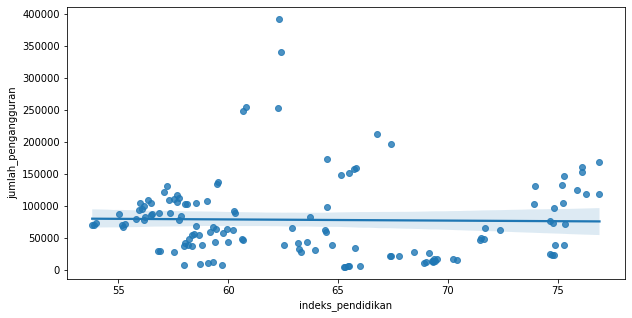

In [34]:
plt.figure(figsize=(10,5))
sns.regplot(data=gabung, x=gabung.indeks_pendidikan, y=gabung.jumlah_pengangguran)
plt.show()

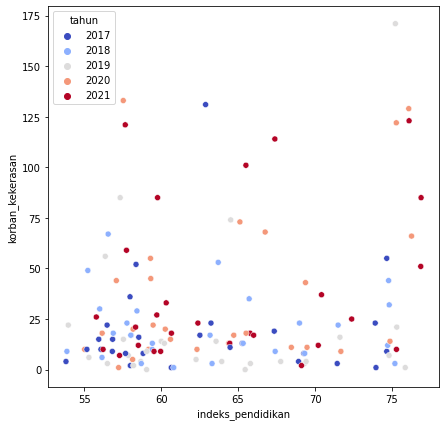

In [35]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gabung, y=gabung.korban_kekerasan, x=gabung.indeks_pendidikan, hue=gabung.tahun, palette='coolwarm')
plt.show()

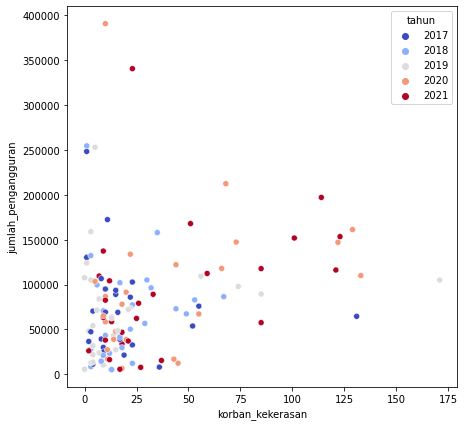

In [36]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gabung, x=gabung.korban_kekerasan, y=gabung.jumlah_pengangguran, hue=gabung.tahun, palette='coolwarm')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


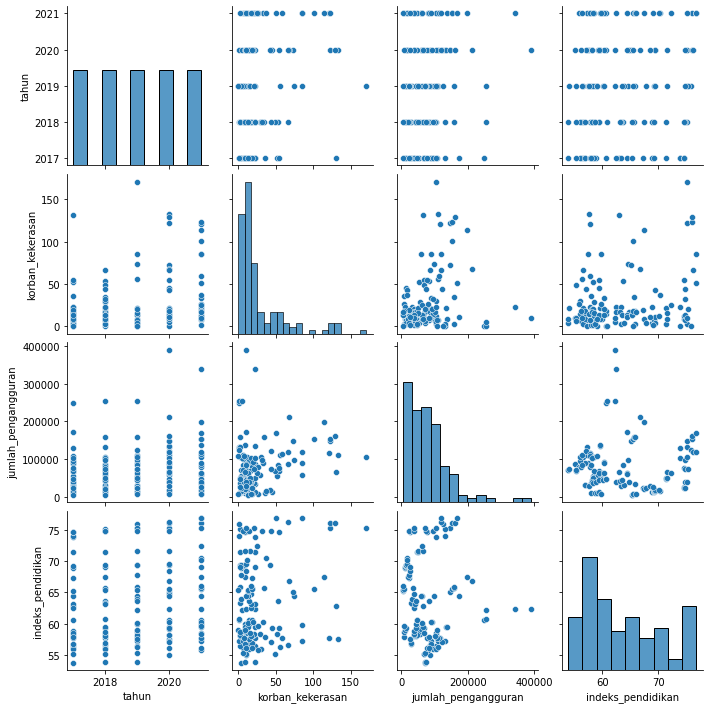

In [37]:
sns.pairplot(gabung)
plt.show()

In [38]:
from phik import phik_matrix
import seaborn as sns
import numpy as np

def plot_phik_matrix(gabung):

    phik_mat = phik_matrix(gabung)
    plt.figure(figsize=(14, 5))
    sns.heatmap(phik_mat, annot=True, cmap='coolwarm')
    plt.title('Korelasi Antar Variable')
    plt.show()


interval columns not set, guessing: ['korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']


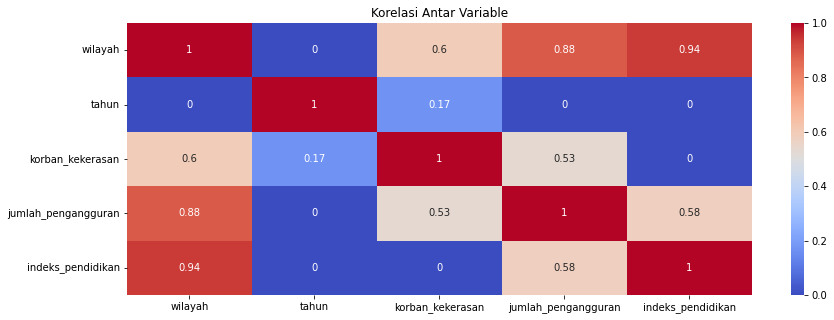

In [39]:
plot_phik_matrix(gabung)

Berdasarkan grafik Phik Matrix, wilayah sangat memiliki korelasi tinggi terhadap indeks pendidikan, jumlah pengangguran, dan korban kekerasan. Dengan kata lain, 3 fitur tersebut sangat dipengaruhi oleh faktor geografis.

* Tingkat Pendidikan:  
Jika wilayah tersebut jauh dari pemukiman modern atau minimnya transportasi yang memadai, maka mungkin sulit bagi penduduknya untuk mendapatkan akses ke fasilas pendidikan seperti sekolah atau perguruan tinggi.  
Wilayah yang memiliki sedikit sekolah atau perguruguan tinggi akan membatasi akses penduduk ke pendidikan yang lebih baik, terutama bagi mereka masyarakat yang tinggal jauh dari kota besar.  

* Tingkat kekerasan :  
WIlayah dengan tingkat kriminalitas yang tinggi memiliki risiko lebih tinggi terhadap kekerasan. Wilayah yang kurang terpantau oleh pihak apart penegak hukum dapat menyebabkan kasus kekerasan yang tidak terungkap. Penyebab tingginya tingkat kekerasan dapat disebabkan oleh beberapa faktor yang akan penulis kaji pada bahasan berikutnya.

* Tingkat pengangguran :  
Wilayah yang bergantung pada satu sektor ekonomi tertentu akan lebih rentan terhadap fluktuasi ekonomi dan pengangguran yang tinggi. Tingkat kemiskinan yang tinggi dan kurangnya akses ke layanan sosial seperti pelatihan keterampilan dan layanan karir dapat mempengaruhi tingkat pengangguran di wilayah tersebut. Jika wilayah tersebut terpencil atau sulit diakses, maka mungkin lebih sulit bagi penduduknya untuk mencari pekerjaan atau mengakses peluang ekonomi lainnya.

Berdasarkan grafik Phik Matrix diatas, penulis menemukan korelasi antar variable yang saling berkaitan satu sama lain :  

* Wilayah memiliki korelasi kuat terhadap indeks pendidikan, korban kekeraan, dan jumlah pengangguran.  
* Indeks pendidikan memiliki korelasi yang cukup signifikan terhadap jumlah pengangguran. Dengan kata lain keterampilan dasar atau keterampilan lanjutan memiliki peran penting dalam bursa pasar kerja.
* Kekerasan memiliki korelasi yang cukup signifikan terhadap jumlah pengangguran. Kondisi ekonomi yang sulit mendorong seseorang untuk melakukan tindak kriminal yang disebabkan oleh tekanan sosial ataupun kebutuhan ekonomi 

Berdasarkan variabel tersebut, penulis menyimpulkan bahwa wilayah mempengaruhi indeks pendidikan, yang mana indeks pendidikan mempengaruhi jumlah pengangguran, dan jumlah pengangguran meningkatkan jumlah kekerasan pada wilayah tersebut.


# **2. Algoritma Clustering**

Algoritma clustering unsupervised learning adalah salah satu teknik dalam machine learning yang dapat digunakan untuk memisahkan data menjadi kelompok yang berbeda. Dalam kasus ini, algoritma clustering dapat digunakan untuk memisahkan wilayah-wilayah berdasarkan pengaruhnya terhadap kriminalitas dan indeks pendidikan.

Berikut adalah langkah-langkah yang dapat dilakukan untuk menggunakan algoritma clustering unsupervised learning dalam mencari statistik dalam issue sosial pengaruh wilayah terhadap kriminalitas dan indeks pendidikan:

* Kumpulkan data: Pertama-tama, kumpulkan data terkait wilayah, kriminalitas, dan indeks pendidikan. Data ini dapat diperoleh dari sumber seperti lembaga pemerintah, organisasi non-profit, atau lembaga penelitian.

* Preprocessing data: Setelah data dikumpulkan, lakukan preprocessing data untuk memastikan bahwa data tersebut dalam format yang sesuai untuk analisis clustering. Hal ini dapat mencakup menghilangkan outlier, mengisi missing value, dan melakukan normalisasi data.

* Pilih algoritma clustering: Ada beberapa jenis algoritma clustering yang dapat digunakan, seperti k-means, hierarchical clustering, dan density-based clustering. Pilih algoritma clustering yang paling sesuai dengan data yang dimiliki dan tujuan analisis.

* Tentukan jumlah cluster: Setelah memilih algoritma clustering, tentukan jumlah cluster yang ingin dibentuk. Jumlah cluster ini dapat ditentukan berdasarkan pengetahuan domain expert atau dengan menggunakan metode seperti elbow method atau silhouette analysis.

* Lakukan clustering: Setelah menentukan jumlah cluster, jalankan algoritma clustering pada data. Algoritma akan memisahkan wilayah-wilayah ke dalam kelompok-kelompok yang memiliki karakteristik yang serupa dalam hal kriminalitas dan indeks pendidikan.

* Analisis hasil clustering: Setelah clustering selesai dilakukan, analisis hasil clustering untuk menentukan karakteristik dari masing-masing cluster. Hal ini dapat dilakukan dengan melihat nilai rata-rata atau proporsi dari variabel-variabel yang relevan, seperti tingkat kriminalitas atau indeks pendidikan.

Dengan menggunakan algoritma clustering unsupervised learning, kita dapat memperoleh informasi yang lebih mendalam tentang pengaruh wilayah terhadap kriminalitas dan indeks pendidikan. Informasi ini dapat membantu dalam perumusan kebijakan dan strategi yang lebih efektif dalam mengatasi issue sosial yang ada di masyarakat.

## 2.1. Pembersihan Data

### 2.1.1. Outlier

Outlier dalam data statistik merujuk pada nilai yang berbeda secara signifikan dengan nilai lain dalam kumpulan data. Outlier dapat muncul karena berbagai alasan, seperti kesalahan pengukuran, data yang tidak lengkap, atau pengaruh faktor eksternal yang tidak terduga. Outlier dapat mempengaruhi hasil analisis data dan dapat menyebabkan kesalahan dalam mengambil kesimpulan atau membuat keputusan.

Dalam konteks issue sosial pengaruh wilayah terhadap kriminalitas dan indeks pendidikan, outlier dapat terjadi dalam data yang dikumpulkan terkait wilayah, kriminalitas, dan indeks pendidikan. Misalnya, ada wilayah yang memiliki tingkat kriminalitas yang jauh lebih tinggi daripada wilayah-wilayah lainnya, atau wilayah yang memiliki indeks pendidikan yang jauh lebih rendah daripada wilayah-wilayah lainnya. Nilai-nilai ini dapat dianggap sebagai outlier karena berbeda secara signifikan dengan nilai-nilai dalam wilayah lainnya.

Outlier dapat mempengaruhi hasil analisis clustering yang dilakukan dengan algoritma unsupervised learning. Jika outlier tidak dihilangkan atau diatasi dengan benar, maka hasil analisis clustering dapat menjadi bias atau tidak akurat. Oleh karena itu, sebelum melakukan analisis clustering, perlu dilakukan preprocessing data untuk mengidentifikasi dan menangani outlier.

Hubungan outlier dengan data statistik dapat dikatakan sebagai suatu tanda bahwa data tersebut tidak homogen dan memiliki variasi yang signifikan. Outlier dapat memberikan informasi yang penting tentang karakteristik dari suatu kelompok data yang berbeda dari kelompok data lainnya. Namun, outlier juga dapat menunjukkan adanya kesalahan dalam pengukuran atau adanya faktor eksternal yang tidak terduga yang mempengaruhi hasil pengukuran.

Oleh karena itu, outlier perlu diperhatikan dalam analisis data dan dapat dijadikan sebagai bahan untuk analisis lebih lanjut untuk memperoleh pemahaman yang lebih baik tentang karakteristik data yang diamati. Dalam analisis clustering unsupervised learning, outlier dapat menjadi sumber kesalahan dan perlu diatasi dengan benar agar hasil analisis lebih akurat dan bermanfaat.

In [40]:
# memisahkan variable numeric dan categorical
numlist = ['korban_kekerasan', 'jumlah_pengangguran','indeks_pendidikan']
catlist = ['wilayah','tahun']

In [41]:
gabung[numlist].describe()

,korban_kekerasan,jumlah_pengangguran,indeks_pendidikan
count,135.000000,135.000000,135.000000
mean,27.585185,78165.800000,63.560667
std,33.283357,63638.752814,6.695841
min,0.000000,5326.000000,53.820000
25%,8.500000,33385.000000,58.015000
50%,15.000000,67290.000000,62.270000
75%,31.000000,105096.000000,69.055000
max,171.000000,390731.000000,76.890000


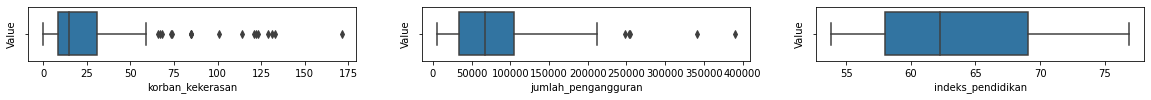

In [42]:
# Boxplot outlier
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,1), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(gabung[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=gabung[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")
     

In [43]:
# outlier cleaning

Q1 = gabung.quantile(0.25)
Q3 = gabung.quantile(0.75)
IQR = Q3 - Q1

# outliers into index array
outl_index = gabung[numlist][((gabung[numlist] < (Q1 - 1.5 * IQR)) |(gabung[numlist] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()

# drop outlier from dataset
gabung2 = gabung.drop(index=outl_index, axis=1)

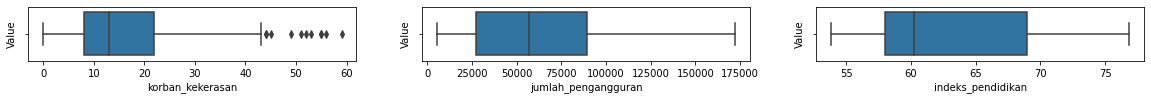

In [44]:
# Boxplot outlier
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,1), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(gabung2[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=gabung2[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")
     

## 2.2. Clustering

### 2.2.1. K-Means Algorithm

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# encoding categorical variable
enc = OrdinalEncoder().fit_transform(gabung2[catlist])

# scaling numerical variable
scl = StandardScaler().fit_transform(gabung2[numlist])

# Dataframe baru setelah encoding dan scaling
gabung3 = pd.DataFrame(np.concatenate([enc, scl], axis=1), columns=gabung[catlist].columns.tolist()+gabung[numlist].columns.tolist()).round(2)

In [46]:
gabung3

,wilayah,tahun,korban_kekerasan,jumlah_pengangguran,indeks_pendidikan
0,14.0,0.0,0.34,0.61,-1.02
1,4.0,0.0,-0.50,0.83,-1.08
2,4.0,1.0,-0.78,0.94,-1.07
3,4.0,2.0,-0.99,1.08,-1.01
4,4.0,3.0,-1.14,1.72,-0.90
...,...,...,...,...,...
108,18.0,0.0,-0.29,-1.38,0.32
109,18.0,1.0,-0.29,-1.38,0.33
110,18.0,2.0,-1.21,-1.37,0.35
111,18.0,3.0,0.06,-1.35,0.36


### 2.2.2. Elbow Method

In [47]:
# Clustering Algorithm
!pip install kneed
from sklearn.cluster import KMeans
from sklearn import metrics
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


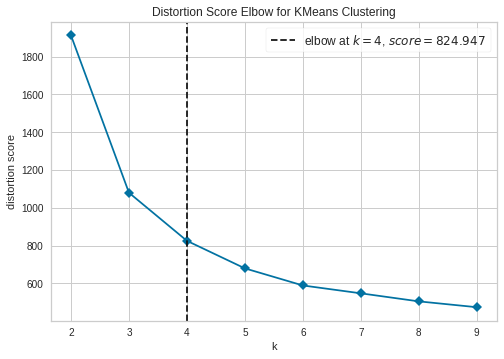

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate range of cluster numbers
c = range(2,10)

# Compute inertia for each cluster number
inertia = [KMeans(n_clusters=i, random_state=np.random.randint(1,1000), n_init=i).fit(gabung3).inertia_ for i in c]

# Instantiate the KelbowVisualizer
visualizer = KElbowVisualizer(KMeans(random_state=np.random.randint(1,1000)), k=c, timings=False)

# Fit the data to the visualizer
visualizer.fit(gabung3)

# Display the visualization
visualizer.show()


Elbow method adalah metode yang digunakan dalam clustering untuk menentukan jumlah klaster yang optimal pada dataset. Tujuan dari elbow method adalah untuk menentukan titik siku (elbow) pada grafik antara jumlah klaster dan nilai inertia, yang menandakan jumlah klaster optimal untuk data tersebut.  

Titik siku pada grafik adalah jumlah klaster optimal yang harus dipilih. Hal ini karena ketika jumlah klaster terlalu kecil, nilai inertia mungkin terlalu tinggi, sementara ketika jumlah klaster terlalu banyak, nilai inertia mungkin terlalu rendah dan tidak efektif dalam memisahkan kelompok data. Elbow method membantu memilih jumlah klaster yang memberikan nilai inertia yang optimal dan kualitas klaster yang baik pada dataset tertentu. Kneelocator menunjukkan bahwa jumlah klaster optimal pada dataset adalah 4.

### 2.2.3. Principal Component Analysis (PCA)

{2: 0.962, 3: 0.9797, 4: 0.9932}


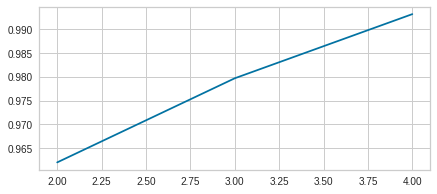

In [49]:
# PCA
var_ratio={}
c = range(2,5)
for n in c:
    pc = PCA(n_components=n)
    cr_pca = pc.fit(gabung3)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_).round(4)

pd.Series(var_ratio).plot(figsize=(7,3), grid=True)
print(var_ratio)

PCA (Principal Component Analysis) adalah metode reduksi dimensi yang digunakan untuk mengurangi dimensi data yang kompleks menjadi dimensi yang lebih sedikit tetapi tetap menjaga informasi yang signifikan. PCA dapat digunakan bersama dengan algoritma clustering untuk memudahkan analisis dan pemahaman pada data yang kompleks.

Dalam pernyataan Anda, disebutkan bahwa pada analisis PCA dengan algoritma clustering, terdapat tiga kelompok data (cluster) yang ditemukan, yaitu cluster 2 dengan nilai 0.962, cluster 3 dengan nilai 0.9797, dan cluster 4 dengan nilai 0.9932. Nilai ini merujuk pada nilai keakuratan (accuracy) atau validitas (validity) dari masing-masing kelompok data, di mana semakin tinggi nilai tersebut menunjukkan semakin baik kualitas kelompok data tersebut dalam mewakili informasi yang ada dalam dataset.

Berdasarkan nilai tersebut, kelompok data pada cluster 4 memiliki nilai keakuratan (accuracy) yang paling tinggi, diikuti oleh kelompok data pada cluster 3 dan cluster 2

### 2.2.4. Pengelompokan data berdasarkan cluster

In [50]:
# pilih 4 cluster

pc_final = PCA(n_components=2).fit(gabung3)
reduced_cr = pc_final.fit_transform(gabung3)

In [86]:
# assgin cluster into algorithm

km = KMeans(n_clusters = 4, 
              random_state=np.random.randint(1,100), 
              init='random', n_init=10,
              algorithm='full', 
              max_iter=1)

labels = km.fit_predict(gabung3)
cluster = km.labels_ 

In [87]:
# dataframe baru setelah penambahan cluster
gabung4 = pd.DataFrame(np.concatenate([pd.DataFrame(cluster), gabung2], axis=1), columns=['cluster']+gabung.columns.tolist())

In [88]:
gabung4

,cluster,wilayah,tahun,korban_kekerasan,jumlah_pengangguran,indeks_pendidikan
0,1,KABUPATEN SUKABUMI,2017,22,86014,56.49
1,2,KABUPATEN CIANJUR,2017,10,95100,56.09
2,2,KABUPATEN CIANJUR,2018,6,99647,56.16
3,2,KABUPATEN CIANJUR,2019,3,105125,56.51
4,2,KABUPATEN CIANJUR,2020,1,131016,57.24
...,...,...,...,...,...,...
108,1,KOTA BANJAR,2017,13,5337,65.27
109,1,KOTA BANJAR,2018,13,5326,65.33
110,3,KOTA BANJAR,2019,0,5772,65.46
111,3,KOTA BANJAR,2020,18,6610,65.52


In [89]:
gabung4.cluster.value_counts()

3    35
0    30
2    29
1    19
Name: cluster, dtype: int64

Hasil clustering pada dataset terdapat 4 cluster yaitu cluster 0, cluster 1, cluster 2, dan cluster 3, yang mana dataset tersebut adalah dataset yang telah dihilangkan outlier-nya atau sebaran data yang abnormal telah dihilangkan. Untuk studi analisis ini penulis memerlukan dataset asli yang mana memerlukan cluster. Maka algoritma clustering diatas bisa kita gunakan kembali untuk memprediksi cluster pada dataset asli tanpa harus menghilangkan outlier nya.

# **3. Prediksi Cluster Untuk Dataset Asli**

## 3.1. Prediksi Cluster

In [90]:
# encoding categorical variable
enc2 = OrdinalEncoder().fit_transform(gabung[catlist])

# scaling numerical variable
scl2 = StandardScaler().fit_transform(gabung[numlist])

# Dataframe baru setelah encoding dan scaling
gabung5 = pd.DataFrame(np.concatenate([enc2, scl2], axis=1), columns=gabung[catlist].columns.tolist()+gabung[numlist].columns.tolist()).round(2)

In [91]:
# prediksi cluster pada dataset awal
cluster_new = km.fit_predict(gabung5)

In [92]:
gabung5 = pd.DataFrame(np.concatenate([pd.DataFrame(cluster_new), gabung], axis=1), columns=['cluster']+gabung.columns.tolist())

In [93]:
gabung5

,cluster,wilayah,tahun,korban_kekerasan,jumlah_pengangguran,indeks_pendidikan
0,3,KABUPATEN BOGOR,2017,1,248368,60.66
1,3,KABUPATEN BOGOR,2018,1,254590,60.82
2,3,KABUPATEN BOGOR,2019,5,253014,62.27
3,3,KABUPATEN BOGOR,2020,10,390731,62.33
4,3,KABUPATEN BOGOR,2021,23,340604,62.39
...,...,...,...,...,...,...
130,2,KOTA BANJAR,2017,13,5337,65.27
131,2,KOTA BANJAR,2018,13,5326,65.33
132,2,KOTA BANJAR,2019,0,5772,65.46
133,2,KOTA BANJAR,2020,18,6610,65.52


1    36
3    35
2    34
0    30
Name: cluster, dtype: int64


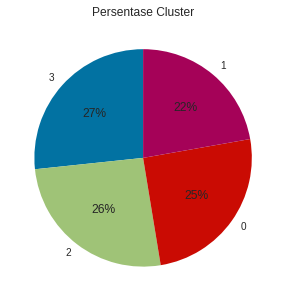

In [94]:
print(gabung5.cluster.value_counts())
plt.figure(figsize=(5,5))
plt.pie(gabung5.cluster.value_counts(), labels=gabung5.cluster.unique(), autopct='%1.0f%%', startangle=90)
plt.title('Persentase Cluster')
plt.show()

Setelah dilakukan clustering pada dataset asli, terdapat 4 cluster yang porsi masing-masing cluster cukup seimbang yaitu cluster 0 26%, cluster 1 26%, cluster 2 22%, dan cluster 3 26%.

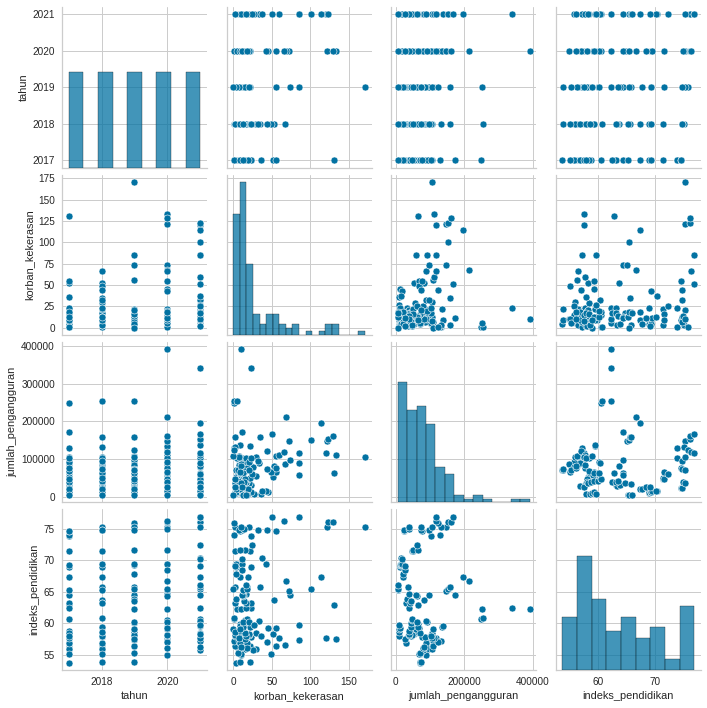

In [95]:
# pairplot dataset asli sebelum clustering

sns.pairplot(gabung)

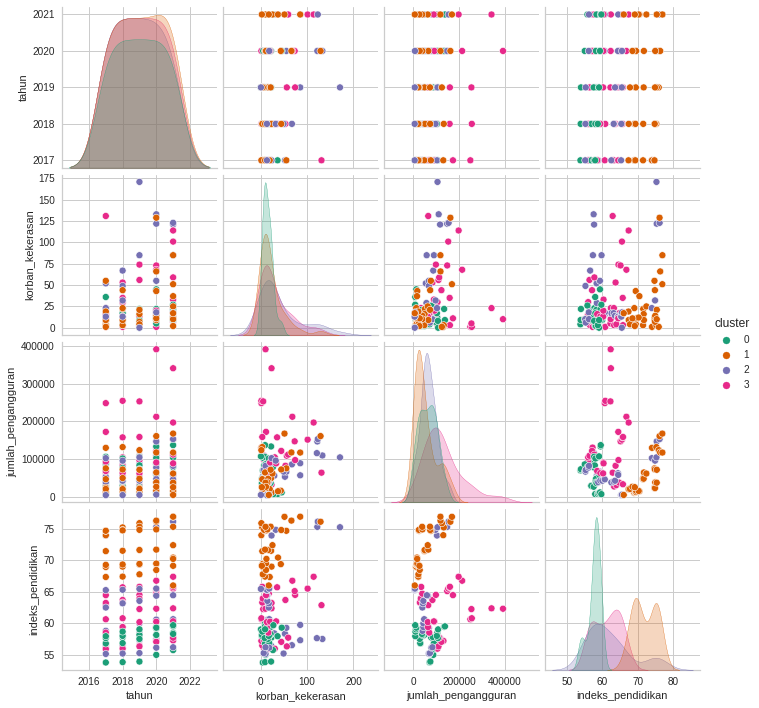

In [96]:
# pairplot dataset asli setelah clustering

sns.pairplot(data=gabung5, hue='cluster', palette='Dark2')

## 3.2. Penamaan Cluster

In [97]:
gabung5.cluster = gabung5.cluster.replace({0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'})
gabung5.korban_kekerasan = gabung5.korban_kekerasan.astype(int)
gabung5.jumlah_pengangguran = gabung5.jumlah_pengangguran.astype(int)
gabung5.indeks_pendidikan = gabung5.indeks_pendidikan.astype(float)

Untuk memudahkan pembaca, penamaan default cluster diubah menjadi A, B, C, dan D

## 3.3. Deskriptif Statistik

In [98]:
# Cluster A Deskriptif Statistik
gabung5[gabung5.cluster == 'A'].describe().round().T

,count,mean,std,min,25%,50%,75%,max
korban_kekerasan,30.0,14.0,10.0,0.0,8.0,11.0,21.0,45.0
jumlah_pengangguran,30.0,62930.0,38107.0,7839.0,31760.0,66944.0,88498.0,137412.0
indeks_pendidikan,30.0,58.0,2.0,54.0,57.0,58.0,59.0,60.0


**Cluster A**  
* Jumlah rata-rata per tahun kasus kekerasan sebanyak 31, dengan nilai terendah 1 orang dan tertinggi 131 orang.
* Rata-rata jumlah pengangguran per tahun 130.163, dengan nilai terendah 28.145 dan nilai tertinggi 390.731.
* Rata-rata indeks pendidikan diangka 64, dengan nilai terendah 56 dan nilai tertinggi 76.

In [99]:
# Cluster B Deskriptif Statistik
gabung5[gabung5.cluster == 'B'].describe().round().T

,count,mean,std,min,25%,50%,75%,max
korban_kekerasan,36.0,22.0,27.0,1.0,6.0,12.0,24.0,129.0
jumlah_pengangguran,36.0,51853.0,46762.0,5747.0,16846.0,26838.0,72514.0,167974.0
indeks_pendidikan,36.0,72.0,3.0,66.0,69.0,72.0,75.0,77.0


**Cluster B**
* Jumlah rata-rata kasus kekerasan per tahun sebanyak 15 orang, dengan angka terendah 0 dan angka tertinggi 49.
* Jumlah rata-rata pengangguran per tahun sebanyak 54.619 orang, dengan nilai terendah 7.839 dan nilai tertinggi 137.412.
* Rata-rata indeks pendidikan per tahun di angka 58, dengan nilai terendah 55 dan nilai tertinggi 61.

In [100]:
# Cluster C Deskriptif statistik
gabung5[gabung5.cluster == 'C'].describe().round().T

,count,mean,std,min,25%,50%,75%,max
korban_kekerasan,34.0,41.0,45.0,0.0,13.0,18.0,54.0,171.0
jumlah_pengangguran,34.0,65942.0,36372.0,5326.0,43430.0,60916.0,86427.0,153505.0
indeks_pendidikan,34.0,62.0,6.0,55.0,58.0,60.0,65.0,76.0


**Cluster C**
* Rata - rata kasus kekerasan per tahun 27 orang, dengan angka terendah 1 orang dan angka tertinggi 131 orang.
* Rata - rata pengangguran per tahun 119.895, dengan nilai terendah 28.145 orang dan nilai tertinggi 390.731 orang.
* rata - rata indeks pendidikan per tahun di angka 60, dengan nilai terendah 54 dan nilai tertinggi 67.

In [101]:
# CLuster D deskriptif statistik
gabung5[gabung5.cluster == 'D'].describe().round().T

,count,mean,std,min,25%,50%,75%,max
korban_kekerasan,35.0,31.0,34.0,1.0,6.0,17.0,48.0,131.0
jumlah_pengangguran,35.0,130163.0,85540.0,28145.0,76025.0,105184.0,158474.0,390731.0
indeks_pendidikan,35.0,61.0,4.0,56.0,58.0,62.0,64.0,67.0


**Cluster D**
* Rata - rata kasus kekerasan per tahun sebanyak 22 orang, dengan angka terendah 1 orang dan angka tertinggi 129 orang.
* rata - rata jumlah pengangguran per tahun sebanyak 53.170 orang, dengan angka terendah 11.376 orang dan angka tertinggi 167.974.
* Rata - rata indeks pendidikan per tahun di angka 72, dengan nilai terendah 67 dan nilai tertinggi 77.

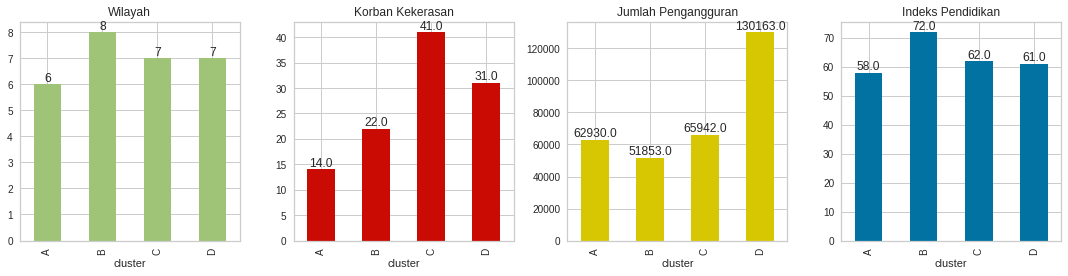

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

# Plot 0: Wilayah
data = gabung5.groupby('cluster')['wilayah'].nunique()
data.plot(kind='bar', title='Wilayah', color='g', ax=axes[0])
axes[0].bar_label(axes[0].containers[0], labels=data.values, label_type='edge')

# Plot 1: Korban Kekerasan
data = gabung5.groupby(by='cluster').mean().korban_kekerasan.round()
data.plot(kind='bar', title='Korban Kekerasan', color='r', ax=axes[1])
axes[1].bar_label(axes[1].containers[0], labels=data.values, label_type='edge')

# Plot 2: Jumlah Pengangguran
data = gabung5.groupby(by='cluster').mean().jumlah_pengangguran.round()
data.plot(kind='bar', title='Jumlah Pengangguran', color='y', ax=axes[2])
axes[2].bar_label(axes[2].containers[0], labels=data.values, label_type='edge')

# Plot 3: Indeks Pendidikan
data = gabung5.groupby(by='cluster').mean().indeks_pendidikan.round()
data.plot(kind='bar', title='Indeks Pendidikan', ax=axes[3])
axes[3].bar_label(axes[3].containers[0], labels=data.values, label_type='edge')

plt.tight_layout()
plt.show()


* Terdapat 5 wilayah dalam cluster A, 6 wilayah dalam cluster B, 9 wilayah dalam cluster C, dan 7 wilayah dalam cluster D.
* Cluster A memiliki rata - rata tertinggi yaitu 50 orang per tahun nya, jika dibandingkan dengan cluster lainnya, dan cluster B adalah yang terendah yaitu 15 orang per tahun.
* Cluster C memiliki rata - rata tertinggi untuk pengangguran per tahun yaitu diangka 119.895. Sementara itu, Cluster B dan Cluster D memiliki angka yang hampir sejajar yaitu di angka 54.619 dan 53.170.
* Cluster D adalah wilayah yang memiliki tingkat indeks pendidikan tertinggi yaitu 72 dan indeks pendidikan terendah yaitu cluster B dengan angka 58 yang mana hampir sejajar dengan Cluster yaitu 60.

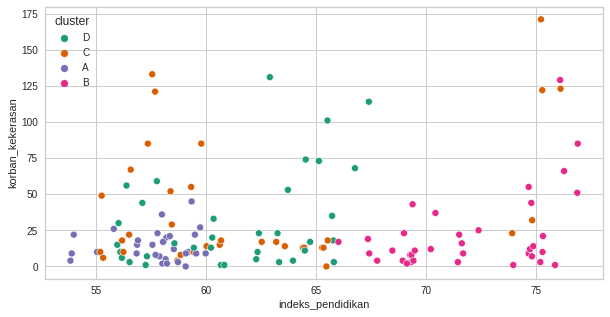

In [103]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=gabung5, x=gabung5.indeks_pendidikan, y=gabung5.korban_kekerasan, hue=gabung5.cluster, palette='Dark2')
plt.show()

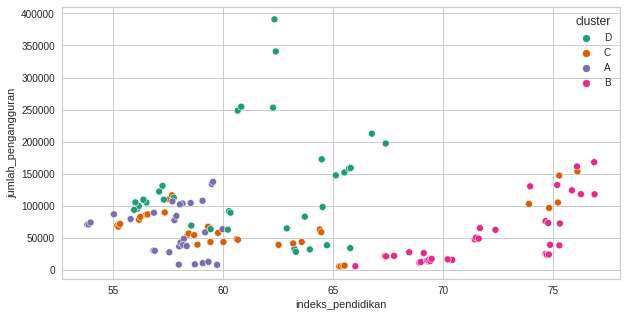

In [104]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=gabung5, x=gabung5.indeks_pendidikan, y=gabung5.jumlah_pengangguran, hue=gabung5.cluster, palette='Dark2')
plt.show()

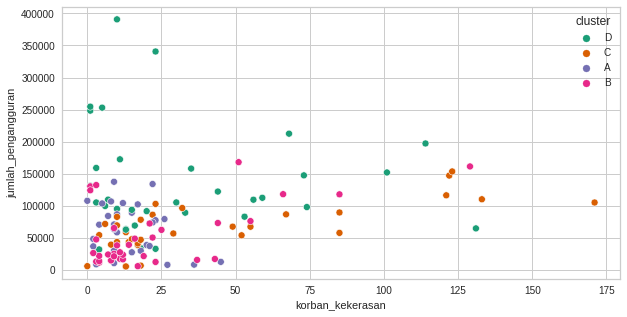

In [105]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=gabung5, y=gabung5.jumlah_pengangguran, x=gabung5.korban_kekerasan, hue=gabung5.cluster, palette='Dark2')
plt.show()

Pada dataset 'gabung5' masing - masing fitur/kolom memiliki rentang angka yang berbeda satu sama lain antara fitur lainnya, sehingga skala angka nya tidak sejajar. Maka dari itu penulis perlu merubahnya menjadi skala 1 sampai 100 di setiap fiturnya dengan menggunakan preprocessing MinMaxScaler.

In [106]:
# Rentang angka pada gabung5
gabung5.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
korban_kekerasan,135.0,27.59,33.28,0.00,8.50,15.00,31.00,171.00
jumlah_pengangguran,135.0,78165.80,63638.75,5326.00,33385.00,67290.00,105096.00,390731.00
indeks_pendidikan,135.0,63.56,6.70,53.82,58.02,62.27,69.06,76.89


## 3.4. Penyetaraan Rentang Numerik

In [107]:
# merubah skala 0 sampai 1 untuk masing - masing fitur

from sklearn.preprocessing import MinMaxScaler
gabung6 = pd.DataFrame(np.concatenate([gabung5[['cluster', 'wilayah', 'tahun']], pd.DataFrame(MinMaxScaler().fit_transform(gabung5[numlist]).round(2))], axis=1), columns=gabung5.columns.tolist())

In [108]:
gabung6

,cluster,wilayah,tahun,korban_kekerasan,jumlah_pengangguran,indeks_pendidikan
0,D,KABUPATEN BOGOR,2017,0.01,0.63,0.3
1,D,KABUPATEN BOGOR,2018,0.01,0.65,0.3
2,D,KABUPATEN BOGOR,2019,0.03,0.64,0.37
3,D,KABUPATEN BOGOR,2020,0.06,1.0,0.37
4,D,KABUPATEN BOGOR,2021,0.13,0.87,0.37
...,...,...,...,...,...,...
130,C,KOTA BANJAR,2017,0.08,0.0,0.5
131,C,KOTA BANJAR,2018,0.08,0.0,0.5
132,C,KOTA BANJAR,2019,0.0,0.0,0.5
133,C,KOTA BANJAR,2020,0.11,0.0,0.51


In [109]:
gabung6.dtypes

cluster                object
wilayah                object
tahun                  object
korban_kekerasan       object
jumlah_pengangguran    object
indeks_pendidikan      object
dtype: object

In [110]:
# merubah tipe data object menjadi data numerik
gabung6[numlist] = gabung6[numlist].astype(float)
gabung6[numlist] = gabung6[numlist] * 100

In [111]:
gabung6[numlist].describe().round().T

,count,mean,std,min,25%,50%,75%,max
korban_kekerasan,135.0,16.0,19.0,0.0,5.0,9.0,18.0,100.0
jumlah_pengangguran,135.0,19.0,17.0,0.0,7.0,16.0,26.0,100.0
indeks_pendidikan,135.0,42.0,29.0,0.0,18.0,37.0,66.0,100.0


## 3.5. Informasi Cluster

interval columns not set, guessing: ['korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']


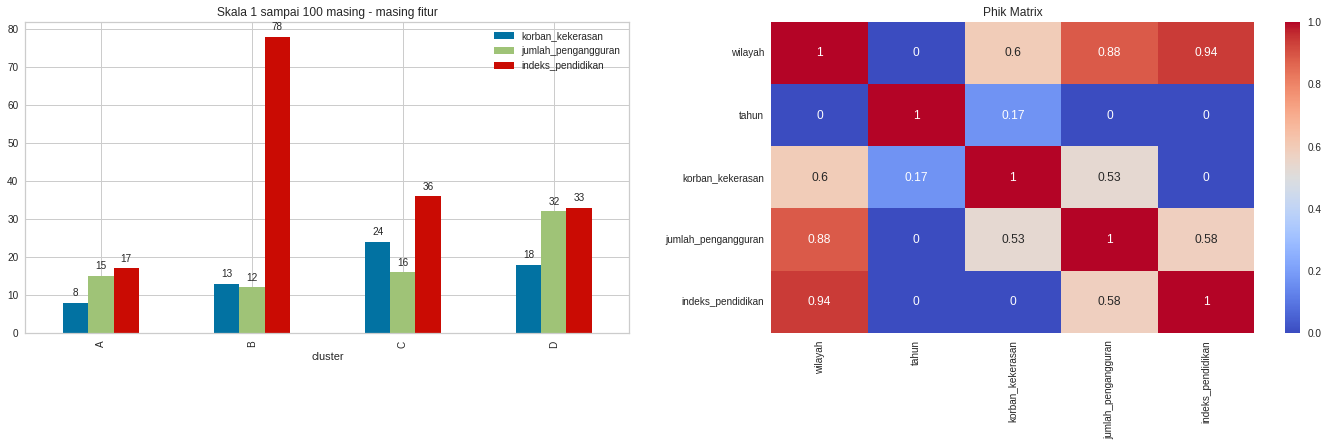

In [112]:
# First graph
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

gabung6[['cluster', 'korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']].groupby(by='cluster').mean().round().plot(kind='bar', grid=True, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, label_type='edge', fontsize=10, padding=5)
ax1.set_title('Skala 1 sampai 100 masing - masing fitur')

# Second graph
phik_mat = phik_matrix(gabung)
sns.heatmap(phik_mat, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Phik Matrix')

fig.tight_layout(pad=3.0)

plt.show()


In [113]:
for cluster in ['A', 'B', 'C', 'D']:
    print(f'Cluster {cluster}:')
    for i, wilayah in enumerate(gabung6[gabung6.cluster == cluster].wilayah.unique(), start=1):
        print(f"{i}. {wilayah}")
    print('\n')


Cluster A:
1. KABUPATEN GARUT
2. KABUPATEN KUNINGAN
3. KABUPATEN MAJALENGKA
4. KABUPATEN INDRAMAYU
5. KABUPATEN KARAWANG
6. KABUPATEN PANGANDARAN


Cluster B:
1. KOTA BOGOR
2. KOTA SUKABUMI
3. KOTA CIREBON
4. KOTA BEKASI
5. KOTA DEPOK
6. KOTA CIMAHI
7. KOTA TASIKMALAYA
8. KOTA BANJAR


Cluster C:
1. KABUPATEN SUKABUMI
2. KABUPATEN TASIKMALAYA
3. KABUPATEN SUMEDANG
4. KABUPATEN SUBANG
5. KABUPATEN PURWAKARTA
6. KOTA BANDUNG
7. KOTA BANJAR


Cluster D:
1. KABUPATEN BOGOR
2. KABUPATEN CIANJUR
3. KABUPATEN BANDUNG
4. KABUPATEN CIAMIS
5. KABUPATEN CIREBON
6. KABUPATEN BEKASI
7. KABUPATEN BANDUNG BARAT




## 3.6. Geografi Map

In [114]:
!pip install geopy folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
import folium
from geopy.geocoders import Nominatim

# list of district names in West Java province
cluster_a = gabung6[gabung6.cluster == 'A'].wilayah.unique().tolist()
cluster_b = gabung6[gabung6.cluster == 'B'].wilayah.unique().tolist()
cluster_c = gabung6[gabung6.cluster == 'C'].wilayah.unique().tolist()
cluster_d = gabung6[gabung6.cluster == 'D'].wilayah.unique().tolist()

# initialize geolocator
geolocator = Nominatim(user_agent="west_java_mapper")

# initialize map centered on West Java province
cluster_a_map = folium.Map(location=[-7.0909, 107.6689], zoom_start=9)
cluster_b_map = folium.Map(location=[-7.0909, 107.6689], zoom_start=9)
cluster_c_map = folium.Map(location=[-7.0909, 107.6689], zoom_start=9)
cluster_d_map = folium.Map(location=[-7.0909, 107.6689], zoom_start=9)


### 3.6.1. Cluster A

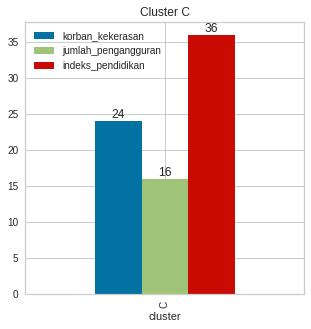

1. KABUPATEN GARUT
2. KABUPATEN KUNINGAN
3. KABUPATEN MAJALENGKA
4. KABUPATEN INDRAMAYU
5. KABUPATEN KARAWANG
6. KABUPATEN PANGANDARAN


In [143]:
# group data by 'cluster' column and calculate mean
cluster_a_bar = gabung6[gabung6.cluster == 'A'][['cluster', 'korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']].groupby('cluster').mean().round()
ax = cluster_c_bar.plot(kind='bar', grid=True, figsize=(5,5), title='Cluster C')
for i, container in enumerate(ax.containers):
    ax.bar_label(container, label_type='edge')
plt.show()


# Add markers to the map for each district in cluster_a
for i, district in enumerate(cluster_a, start=1):
    location = geolocator.geocode(district + ", West Java")
    if location:
        folium.Marker(location=[location.latitude, location.longitude], popup=district).add_to(cluster_a_map)
    print(f"{i}. {district}")

# Show the map
cluster_a_map


## 3.6.2. Cluster B

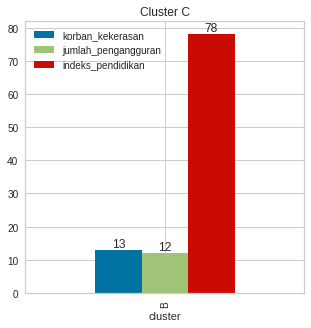

1. KOTA BOGOR
2. KOTA SUKABUMI
3. KOTA CIREBON
4. KOTA BEKASI
5. KOTA DEPOK
6. KOTA CIMAHI
7. KOTA TASIKMALAYA
8. KOTA BANJAR


In [142]:
# group data by 'cluster' column and calculate mean
cluster_b_bar = gabung6[gabung6.cluster == 'B'][['cluster', 'korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']].groupby('cluster').mean().round()
ax = cluster_b_bar.plot(kind='bar', grid=True, figsize=(5,5), title='Cluster C')
for i, container in enumerate(ax.containers):
    ax.bar_label(container, label_type='edge')
plt.show()


# Add markers to the map for each district in cluster_a
for i, district in enumerate(cluster_b, start=1):
    location = geolocator.geocode(district + ", West Java")
    if location:
        folium.Marker(location=[location.latitude, location.longitude], popup=district).add_to(cluster_b_map)
    print(f"{i}. {district}")

# Show the map
cluster_b_map


### 3.6.3. Cluster C

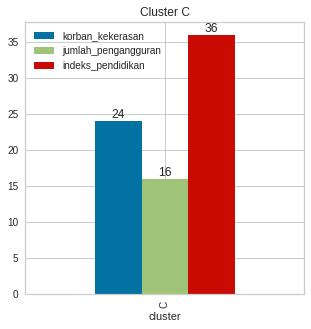

1. KABUPATEN SUKABUMI
2. KABUPATEN TASIKMALAYA
3. KABUPATEN SUMEDANG
4. KABUPATEN SUBANG
5. KABUPATEN PURWAKARTA
6. KOTA BANDUNG
7. KOTA BANJAR


In [140]:
# group data by 'cluster' column and calculate mean
cluster_c_bar = gabung6[gabung6.cluster == 'C'][['cluster', 'korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']].groupby('cluster').mean().round()
ax = cluster_c_bar.plot(kind='bar', grid=True, figsize=(5,5), title='Cluster C')
for i, container in enumerate(ax.containers):
    ax.bar_label(container, label_type='edge')
plt.show()


# Add markers to the map for each district in cluster_a
for i, district in enumerate(cluster_c, start=1):
    location = geolocator.geocode(district + ", West Java")
    if location:
        folium.Marker(location=[location.latitude, location.longitude], popup=district).add_to(cluster_c_map)
    print(f"{i}. {district}")

# Show the map
cluster_c_map


### 3.6.4. Cluster D

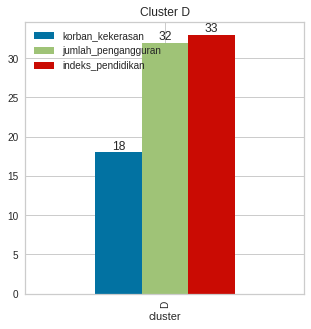

1. KABUPATEN BOGOR
2. KABUPATEN CIANJUR
3. KABUPATEN BANDUNG
4. KABUPATEN CIAMIS
5. KABUPATEN CIREBON
6. KABUPATEN BEKASI
7. KABUPATEN BANDUNG BARAT


In [138]:
# group data by 'cluster' column and calculate mean
cluster_d_bar = gabung6[gabung6.cluster == 'D'][['cluster', 'korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']].groupby('cluster').mean().round()
ax = cluster_d_bar.plot(kind='bar', grid=True, figsize=(5,5), title='Cluster D')
for i, container in enumerate(ax.containers):
    ax.bar_label(container, label_type='edge')
plt.show()


# Add markers to the map for each district in cluster_a
for i, district in enumerate(cluster_d, start=1):
    location = geolocator.geocode(district + ", West Java")
    if location:
        folium.Marker(location=[location.latitude, location.longitude], popup=district).add_to(cluster_d_map)
    print(f"{i}. {district}")

# Show the map
cluster_d_map


interval columns not set, guessing: ['korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']


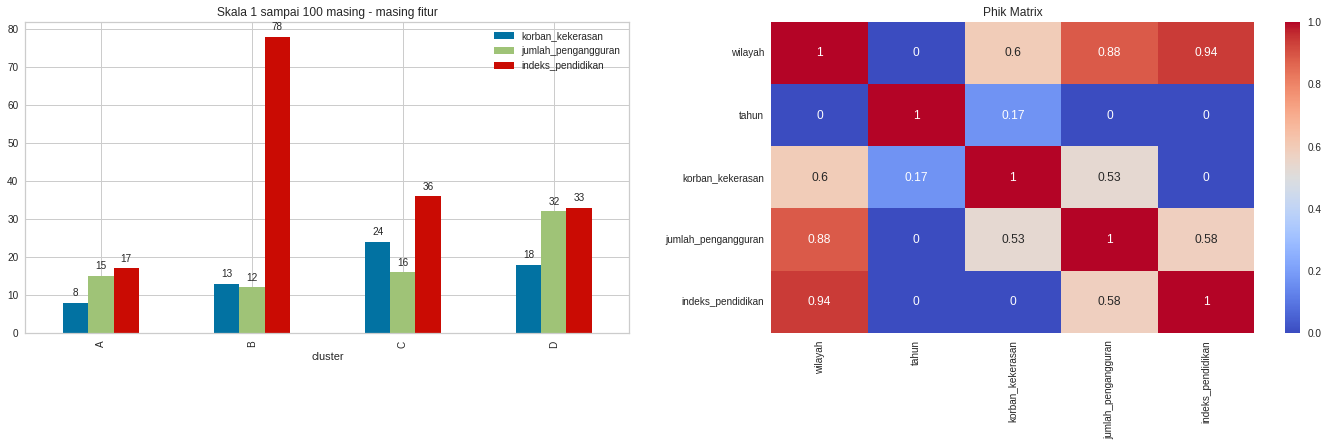

In [144]:
# First graph
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

gabung6[['cluster', 'korban_kekerasan', 'jumlah_pengangguran', 'indeks_pendidikan']].groupby(by='cluster').mean().round().plot(kind='bar', grid=True, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, label_type='edge', fontsize=10, padding=5)
ax1.set_title('Skala 1 sampai 100 masing - masing fitur')

# Second graph
phik_mat = phik_matrix(gabung)
sns.heatmap(phik_mat, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Phik Matrix')

fig.tight_layout(pad=3.0)

plt.show()


Setelah rentang angka masing - masing fitur disamaratakan, pola cluster sudah terlihat jelas seperti pada grafik diatas.  
* Cluster B adalah adalah wilayah yang memiliki angka indeks pendidikan tertinggai dari cluster lainnya. Terdapat informasi yang jelas bahwa pendidikan pada wilayah ini mempengaruhi tingkat pengangguran dan kasus kekerasan. Terdapat 7 kota yang masuk ke dalam Cluster B, yang mana kota adalah wilayah yang memiliki akses pendidikan terbanyak sehingga grafik di atas telah membuktikan bahwa wilayah memiliki pengaruh besar terhadap pendidikan.

* Cluster A adalah wilayah yang unik, indeks pendidikan di wilayah ini memiliki angka paling rendah dibandingkan cluster lainnya namun memiliki angka kekerasan yang paling rendah di antara cluster lainnya, serta tingkat pengangguran di wilayah ini sejajar dengan tingkat pengangguran di cluster B. Untuk asumsi sementara, penulis menyimpulkan bahwa indeks pendidikan pada wilayah dalam cluster A tidak memiliki pengaruh pada tingkat kekerasan. Selain itu, tingkat pengangguran dalam cluster A lebih rendah dari tingkat pengangguran pada cluster D padahal tingkat pendidikan pada Cluster A dan Cluster B sangat berbeda jauh. Phik Matrix menunjukan angka korelasi fitur terhadap fitur lain, namun pada Cluster A tingkat pendidikan tidak mempengaruhi tingkat pengangguran. Penulis tidak bisa membuat kesimpulan tanpa data yang empiris, asumsi sementara bahwa penduduk pada wilayah di Cluster A memiliki pekerjaan atau profesi yang tidak membutuhkan pendidikan tinggi, kemungkinan petani, peternak, atau pedagang sehingga penduduk pada wilayah tersebut memiliki standard kesejahteraan hidup sendiri tanpa khawatir tidak memiliki pendidikan yang mana kondisi tersebut mengurangi tingkat kekerasan atau kriminalitas.

* Cluster C adalah wilayah yang mimiliki kasus kekerasan terbanyak diantara cluter lain. Tingkat pengangguran pada Cluster C hampir sejajar dengan Cluster B, namun faktor tingkat kekerasan pada cluster ini bukan hanya diakibatkan oleh jumlah pengangguran melainkan ada faktor lain yang menyebabkan tingginya kasus kekerasan di wilayah Cluster A. Asumsi sementara, berdasarkan Phik Matrix penulis menyimpulkan bahwa kasus kekerasan pada wilayah Cluster A disebabkan oleh wilayah itu sendiri. Penulis tidak bisa membuat kesimpulan tanpa data yang empiris, namun asumsi sementara kemungkinan wilayah tersebut memang memiliki tingkat kriminalitas yang tinggi. Tingkat pendidikan pada wilayah Cluster C pun diatas nilai tengah, yang berarti bahwa orang yang berpendidikan pun memiliki kecenderungan melakukan tindak kriminal.

* Cluster D adalah wilayah dengan jumlah pengangguran terbanyak diantara cluster lain. Bisa dikatakan tingkat pendidikan pada Cluster D masih tergolong rendah. Rendahnya tingkat pendidikan pada cluster ini menyebabkan naiknya angka pengangguran. Pada grafik Phik Matrix, indeks pendidikan memiliki korelasi tinggi terhadap wilayah. Asumsi sementara, penulis menyimpulkan bahwa wilayah pada cluster ini memiliki akses ke pendidikan yang tidak memadai. Kesimpulan lain yaitu jumlah ketersediaan lapangan pekerjaan tidak cukup untuk mengurangi pengangguran atau memang wilayah tersebut memiliki perputaran ekonomi yang rendah sehingga penduduk pada wilayah tersebut belum sanggup untuk menciptakan lapangan kerja baru.

# **4. Kesimpulan**

Pada plot heatmap Phik Matrix menunjukan fitur wilayah, kekerasan, pengangguran, dan indeks pendidikan memiliki keterkaitan korelasi satu sama lain. Fitur wilayah memiliki korelasi tinggi pada 3 fitur lainnya yaitu kekerasan, pengangguran, dan indeks pendidikan yang mana 3 fitur tersebut dipengaruhi oleh wilayah.
Adapun skema yang penulis dapatkan yaitu :  

``Wilayah --> tingkat pendidikan --> tingkat pengangguran --> tingkat kekerasan/kriminalitas.``

Berdasarkan temuan informasi diatas terutama pada Cluster B, kota besar memiliki tingkat pendidikan paling tinggi sehingga menurunkan tingkat pengangguran dan tingkat kekerasan. Pada umumnya kota - kota besar memiliki akses pendidikan yang memadai serta lapangan pekeerjaan yang banyak. Akses transportasi yang memadai di kota - kota besar juga mempengaruhi penduduk untuk mencapai institusi pendidikan.

Berbeda dengan wilayah pada Cluster D, tingkat pendidikan di wilayah pada Cluster D masih tergolong rendah sehingga tingkat pengangguran pada cluster ini cukup tinggi. Asumsi sementara penulis, wilayah pada Cluster C adalah wilayah tingkat kabupaten yang mana kemungkinan dari wilayah tersebut tidak memiliki akses pendidikan yang cukup baik. Beberapa alasan tidak memiliki akses pendidikan yang baik yaitu di wilayah kabupaten termasuk desa - desa yang tidak memiliki akses transportasi yang memadai, atau kemungkinan biaya pendidikan yang tidak terjangkau untuk masyarakat kelas menengah kebawah sehingga masyarakat pada wilayah tersebut tidak memiliki keterampilan untuk lapangan pekerjaan. Kemungkinan lain yaitu wilayah tersebut memiliki perputaran ekonomi yang stagnan, kurangnya lapangan pekerjaan meningkatkan jumlah pengangguran. Tingkat kekerasan pada wilayah Cluster D juga cukup rendah, bisa dikatakan hampir sejajar dengan tingkat kekerasan pada Cluster B, yang berarti tingkat pengangguran memiliki korelasi rendah terhadap kekerasan/kriminalitas pada wilayah di Cluster D.

Cluster A adalah wilayah yang cukup unik. Tingkat pendidikan yang rendah seharusnya memiliki tingkat pengangguran yang tinggi, namun pada cluster ini adalah sebaliknya. Tingkat pengangguran di wilayah Cluster A sejajar dengan tingkat pengangguran di Cluster B yang memiliki tingkat pendidikan tertinggi. Sepertinya tingkat pengangguran di wilayah Cluster B memiliki korelasi rendah terhadap tingkat pendidikan. Asumsi sementara penulis, masyarakat pada wilayah ini memiliki pekerjaan yang tidak terlalu mementingkan tingkat pendidikan kemungkinan yaitu petani, pedagang, atau peternak. Masyarakat pada wilayah ini memiliki standard kesejahteraan hidup sendiri yang tidak bergantung pada tingkat pendidikan sehingga mereka menciptakan lapangan kerja sendiri tingkat kekerasan/kriminalitas dapat berkurang atas standard kesejahteraan yang mereka miliki.

Tingkat pendidikan pada Cluster C masih lebih baik jika dibandingkan dengan tingkat pendidikan pada Cluster D. Tingkat pengangguran pada Cluster C hampir sejajar dengan tingkat pengangguran pada cluster lainnya yang masih tergolong rendah, namun wilayah pada cluster ini memiliki tingkat kekerasan yang paling tinggi di antara cluster lainnya. Tingkat pengangguran yang rendah seharusnya dapat menurunkan tingkat kekerasan, namun pada wilayah di Cluster C adalah sebaliknya. Asumsi sementara penulis, sepertinya tingkat kekerasan di wilayah ini tidak terlalu dipengaruhi oleh tingkat pengangguran melainkan di pengaruhi oleh wilayah itu sendiri. Penulis menyimpulkan bahwa masyarakat yang memiliki tingkat pendidikan yang baik memiliki kecenderungan melakukan kekerasan/kriminalitas. Hal ini bisa disebabkan oleh banyak faktor salah satunya yaitu rendahnya kesadaran hukum seperti ketidaktegasan aparatur keamanan dan serta pengaruh pada budaya atau perilaku masyarakat pada wilayah tersebut.

